### 1. Clean raw answers

In [67]:
# List of CSV files representing different tasks
csv_files = [
    './direction_results.csv', 
    './length_results.csv', 
    './position_common_scale_results.csv', 
    './position_non_aligned_scale_results.csv',
    './angle_results.csv',
    './area_results.csv',
    './volume_results.csv',
    './curvature_results.csv',
    './shading_results.csv'
]

In [2]:
pwd

'/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-10epoch/EXP1-Results'

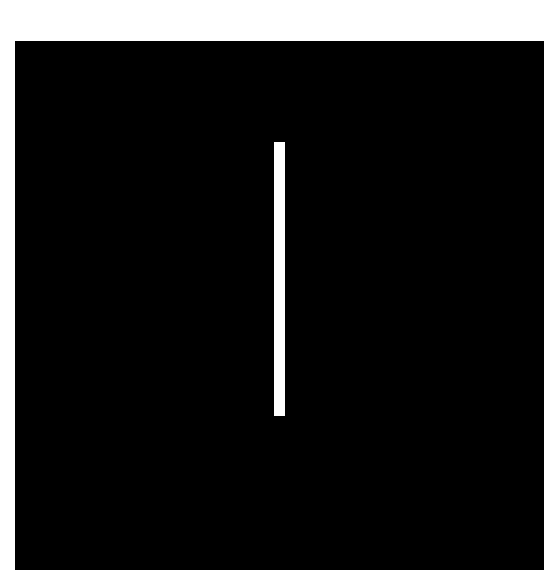

In [37]:
from PIL import Image, ImageOps
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the base directory and relative path to the image
base_dir = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-10epoch/EXP1-Results'
relative_path = 'length/length_image_1.png' 

# Construct the full image path
image_path = os.path.join(base_dir, relative_path)

# Check if the image exists
if os.path.exists(image_path):
    # Load the image and convert to grayscale
    img = Image.open(image_path).convert("L")  # Convert to grayscale
    
    # Convert the image to a NumPy array for processing
    img_array = np.array(img)
    
    # Create a kernel for dilation (size 2 effect)
    kernel = np.array([[1, 1],
                       [1, 1]], dtype=np.uint8)  # A 2x2 kernel
    
    # Perform dilation using the kernel
    from scipy.ndimage import binary_dilation  # Import here to keep the code compact
    thickened_array = binary_dilation(img_array, structure=kernel).astype(np.uint8) * 255  # Scale back to 0-255

    # Convert back to a Pillow image
    thickened_img = Image.fromarray(thickened_array)

    # Add a white border around the thickened image
    img_with_border = ImageOps.expand(thickened_img, border=1, fill="white")  # 10px white border

    # Display the image with a gray background
    plt.figure(figsize=(7, 7))
    plt.imshow(img_with_border, cmap='gray')  # Use grayscale colormap
    plt.gca().set_facecolor('gray')  # Set axes background to gray
    plt.axis('off')  # Hide axes
    plt.title("Displayed Image with Thicker Lines (Size 2)", fontsize=16, color="white")  # White text for title
    plt.show()
else:
    print(f"Image not found at path: {image_path}")


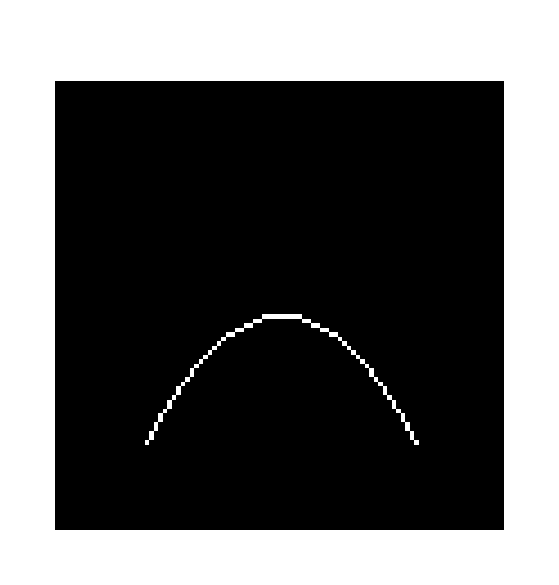

In [16]:
from PIL import Image, ImageOps
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the base directory and relative path to the image
base_dir = '/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-10epoch/EXP1-Results'
relative_path = 'curvature/curvature_image_1.png' 

# Construct the full image path
image_path = os.path.join(base_dir, relative_path)

# Check if the image exists
if os.path.exists(image_path):
    # Load the image and convert to grayscale
    img = Image.open(image_path).convert("L")  # Convert to grayscale

    # Add a white border around the image
    img_with_border = ImageOps.expand(img, border=10, fill="white")  # 10px white border

    # Display the image with a gray background
    plt.figure(figsize=(7, 7))
    plt.imshow(img_with_border, cmap='gray')  # Use grayscale colormap
    plt.gca().set_facecolor('gray')  # Set axes background to gray
    plt.axis('off')  # Hide axes
    plt.title("Displayed Image (Size 1 - No Thickness Change)", fontsize=16, color="white")  # White text for title
    plt.show()
else:
    print(f"Image not found at path: {image_path}")


In [68]:
import pandas as pd
import numpy as np
import os
import re

def clean_raw_answers(file_path):
    """
    Clean raw answers from CSV file, tracking and displaying deleted rows.
    
    Parameters:
    file_path (str): Path to the CSV file
    
    Returns:
    tuple: (cleaned DataFrame, deleted rows DataFrame)
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Store original number of rows
    original_row_count = len(df)
    
   import pandas as pd
import numpy as np
import re

def extract_digits(x):
    """
    Extract digits from a given text. Handles cases where the text starts with 'user' or contains multiple numbers.

    Parameters:
        x (str): Input text.

    Returns:
        float or np.nan: Extracted number or NaN if no number is found.
    """
    if pd.isna(x):
        return np.nan
    
    # Convert to string and clean
    x = str(x).strip().replace('\n', '')
    
    # If string starts with "user", extract the last number
    if x.startswith('user'):
        numbers = re.findall(r'\d+\.?\d*', x)
        return float(numbers[-1]) if numbers else np.nan
    
    # Extract the first number found otherwise
    numbers = re.findall(r'\d+\.?\d*', x)
    return float(numbers[0]) if numbers else np.nan

def clean_experiment_data(file_path):
    """
    Cleans and processes experiment results from a CSV file.

    Parameters:
        file_path (str): Path to the CSV file containing experiment results.

    Returns:
        pd.DataFrame: A cleaned DataFrame with extracted and formatted data.
    """
    # Set pandas display options for easier debugging (optional)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)

    # Read the CSV file
    df = pd.read_csv(file_path)

    # Apply the `extract_digits` function to the 'prediction' column
    df['prediction'] = df['prediction'].apply(extract_digits)

    # Extract the file name from the file path
    df['file_name'] = df['file_path'].str.split('/').str[-1]

    # Reorder and rename columns for clarity
    df = df[['file_name', 'ground_truth', 'model', 'prediction']]

    return df



# Modified dictionary to store both cleaned DataFrames and deleted rows
cleaned_results = {}

for file_path in csv_files:
    try:
        filename = os.path.basename(file_path).replace("_results.csv", "")
        cleaned_df, deleted_rows = clean_raw_answers(file_path)
        
        cleaned_results[filename] = {
            'cleaned_df': cleaned_df,
            'deleted_rows': deleted_rows
        }
        
        print(f"\nProcessed '{filename}':")
        print(f"Cleaned data sample:")
        print(cleaned_df[['image_path', 'ground_truth', 'parsed_answers', 'raw_answers', 'model_name']].head())
        
    except Exception as e:
        print(f"Error processing {file_path}: {e}")

# Accessing the cleaned DataFrames and their deleted rows
df_volume = cleaned_results.get('volume', {}).get('cleaned_df')
deleted_volume = cleaned_results.get('volume', {}).get('deleted_rows')

df_area = cleaned_results.get('area', {}).get('cleaned_df')
deleted_area = cleaned_results.get('area', {}).get('deleted_rows')

df_direction = cleaned_results.get('direction', {}).get('cleaned_df')
deleted_direction = cleaned_results.get('direction', {}).get('deleted_rows')

df_length = cleaned_results.get('length', {}).get('cleaned_df')
deleted_length = cleaned_results.get('length', {}).get('deleted_rows')

df_position_common_scale = cleaned_results.get('position_common_scale', {}).get('cleaned_df')
deleted_position_common_scale = cleaned_results.get('position_common_scale', {}).get('deleted_rows')

df_position_non_aligned_scale = cleaned_results.get('position_non_aligned_scale', {}).get('cleaned_df')
deleted_position_non_aligned_scale = cleaned_results.get('position_non_aligned_scale', {}).get('deleted_rows')

df_angle = cleaned_results.get('angle', {}).get('cleaned_df')
deleted_angle = cleaned_results.get('angle', {}).get('deleted_rows')

df_curvature = cleaned_results.get('curvature', {}).get('cleaned_df')
deleted_curvature = cleaned_results.get('curvature', {}).get('deleted_rows')

df_shading = cleaned_results.get('shading', {}).get('cleaned_df')
deleted_shading = cleaned_results.get('shading', {}).get('deleted_rows')

# Optional: Print summary of available data and deletions
for task in cleaned_results:
    cleaned_count = len(cleaned_results[task]['cleaned_df']) if cleaned_results[task]['cleaned_df'] is not None else 0
    deleted_count = len(cleaned_results[task]['deleted_rows']) if cleaned_results[task]['deleted_rows'] is not None else 0
    print(f"\n{task}:")
    print(f"  Cleaned rows: {cleaned_count}")
    print(f"  Deleted rows: {deleted_count}")


Found 5 rows with NaN values that will be deleted:

Detailed view of rows to be deleted:
    image_path  ground_truth raw_answers       model_name
165        NaN           NaN         NaN            gpt4o
331        NaN           NaN         NaN      CustomLLaMA
497        NaN           NaN         NaN            LLaMA
663        NaN           NaN         NaN  GeminiProVision
829        NaN           NaN         NaN   Gemini1_5Flash

Cleaning Summary:
Original row count: 830
Rows deleted: 5
Final row count: 825

Processed 'direction':
Cleaned data sample:
                                     image_path  ground_truth parsed_answers  \
0  EXP1-Results/direction/direction_image_1.png         125.0          120.0   
1  EXP1-Results/direction/direction_image_2.png         315.0          310.0   
2  EXP1-Results/direction/direction_image_3.png         274.0          270.0   
3  EXP1-Results/direction/direction_image_4.png         357.0           90.0   
4  EXP1-Results/direction/direction_i

In [48]:
deleted_shading

,model_name,run,image_path,ground_truth,raw_answers,forced_repetitions,time_ms,parsed_answers
14,gpt4o,run_0,EXP1-Results/shading/shading_image_15.png,6.0,I cannot interpret images directly without con...,0.0,5884.073257,NaN
22,gpt4o,run_0,EXP1-Results/shading/shading_image_23.png,1.0,I'm unable to provide an estimate for this image.,0.0,5951.029778,NaN
48,gpt4o,run_0,EXP1-Results/shading/shading_image_49.png,5.0,I can't provide an estimate without a visible ...,0.0,6279.800892,NaN
69,gpt4o,run_1,EXP1-Results/shading/shading_image_15.png,6.0,I'm unable to estimate the shading density or ...,0.0,5829.471827,NaN
77,gpt4o,run_1,EXP1-Results/shading/shading_image_23.png,1.0,I cannot provide the estimation for this image.,0.0,6427.330971,NaN
124,gpt4o,run_2,EXP1-Results/shading/shading_image_15.png,6.0,I'm unable to view the image you're referring ...,0.0,6147.307396,NaN
132,gpt4o,run_2,EXP1-Results/shading/shading_image_23.png,1.0,I'm unable to estimate the shading or texture ...,0.0,6070.275545,NaN
158,gpt4o,run_2,EXP1-Results/shading/shading_image_49.png,5.0,"I'm sorry, I can't assist with that.",0.0,6422.725201,NaN
165,gpt4o,average,NaN,NaN,NaN,NaN,NaN,NaN
331,CustomLLaMA,average,NaN,NaN,NaN,NaN,NaN,NaN


## Balance datasets

In [38]:
import pandas as pd
import numpy as np

def balance_all_datasets(cleaned_results):
    """
    Balance all datasets to have the same number of rows by sampling from larger datasets
    to match the size of the smallest dataset.
    
    Parameters:
    cleaned_results (dict): Dictionary containing cleaned DataFrames for each task
    
    Returns:
    dict: Dictionary containing balanced DataFrames for each task
    """
    balanced_results = {}
    dataset_sizes = {}
    
    # First, get the size of each dataset
    for task, data in cleaned_results.items():
        if data['cleaned_df'] is not None and not data['cleaned_df'].empty:
            dataset_sizes[task] = len(data['cleaned_df'])
    
    if not dataset_sizes:
        raise ValueError("No valid datasets found")
    
    # Find the smallest dataset size
    min_size = min(dataset_sizes.values())
    
    print("\nDataset sizes before balancing:")
    for task, size in dataset_sizes.items():
        print(f"{task}: {size} rows")
    
    print(f"\nBalancing all datasets to {min_size} rows (smallest dataset size)")
    
    # Balance each dataset
    for task, data in cleaned_results.items():
        if data['cleaned_df'] is not None and not data['cleaned_df'].empty:
            if len(data['cleaned_df']) > min_size:
                # Sample from larger dataset
                balanced_df = data['cleaned_df'].sample(
                    n=min_size, 
                    random_state=42
                ).reset_index(drop=True)
            else:
                # Keep original dataset if it's already the minimum size
                balanced_df = data['cleaned_df'].reset_index(drop=True)
            
            balanced_results[task] = {
                'balanced_df': balanced_df,
                'original_size': len(data['cleaned_df']),
                'deleted_rows': data['deleted_rows']  # Keep track of deleted rows
            }
    
    # Print summary of balancing
    print("\nBalancing Summary:")
    for task, data in balanced_results.items():
        rows_removed = data['original_size'] - len(data['balanced_df'])
        print(f"\n{task}:")
        print(f"  Original size: {data['original_size']}")
        print(f"  Balanced size: {len(data['balanced_df'])}")
        print(f"  Rows removed in balancing: {rows_removed}")
        print(f"  Previously deleted rows: {len(data['deleted_rows'])}")
    
    return balanced_results

# Apply balancing to all datasets
try:
    balanced_results = balance_all_datasets(cleaned_results)
    
    # Access balanced DataFrames
    balanced_volume = balanced_results.get('volume', {}).get('balanced_df')
    balanced_area = balanced_results.get('area', {}).get('balanced_df')
    balanced_direction = balanced_results.get('direction', {}).get('balanced_df')
    balanced_length = balanced_results.get('length', {}).get('balanced_df')
    balanced_position_common_scale = balanced_results.get('position_common_scale', {}).get('balanced_df')
    balanced_position_non_aligned_scale = balanced_results.get('position_non_aligned_scale', {}).get('balanced_df')
    balanced_angle = balanced_results.get('angle', {}).get('balanced_df')
    balanced_curvature = balanced_results.get('curvature', {}).get('balanced_df')
    balanced_shading = balanced_results.get('shading', {}).get('balanced_df')

    # Optional: Verify balance
    print("\nVerifying final dataset sizes:")
    sizes = []
    for task, data in balanced_results.items():
        if data.get('balanced_df') is not None:
            size = len(data['balanced_df'])
            sizes.append(size)
            print(f"{task}: {size} rows")
    
    if len(set(sizes)) == 1:
        print("\nSuccess: All datasets are balanced with equal number of rows!")
    else:
        print("\nWarning: Datasets have different sizes!")

except Exception as e:
    print(f"Error during balancing: {e}")


Dataset sizes before balancing:
direction: 825 rows
length: 825 rows
position_common_scale: 825 rows
position_non_aligned_scale: 825 rows
angle: 825 rows
area: 825 rows
volume: 825 rows
curvature: 825 rows
shading: 817 rows

Balancing all datasets to 817 rows (smallest dataset size)

Balancing Summary:

direction:
  Original size: 825
  Balanced size: 817
  Rows removed in balancing: 8
  Previously deleted rows: 5

length:
  Original size: 825
  Balanced size: 817
  Rows removed in balancing: 8
  Previously deleted rows: 5

position_common_scale:
  Original size: 825
  Balanced size: 817
  Rows removed in balancing: 8
  Previously deleted rows: 5

position_non_aligned_scale:
  Original size: 825
  Balanced size: 817
  Rows removed in balancing: 8
  Previously deleted rows: 5

angle:
  Original size: 825
  Balanced size: 817
  Rows removed in balancing: 8
  Previously deleted rows: 5

area:
  Original size: 825
  Balanced size: 817
  Rows removed in balancing: 8
  Previously deleted ro

### 5. Caculate all metrics

In [69]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# Dictionary to store metrics for each dataset
metrics_summary = {}

dataframes = {
    'df_direction': df_direction,
    'df_length': df_length,
    'df_position_common_scale': df_position_common_scale,
    'df_position_non_aligned_scale': df_position_non_aligned_scale,
    'df_angle': df_angle,
    'df_area': df_area,
    'df_volume': df_volume,
    'df_curvature': df_curvature,
    'df_shading': df_shading
}

# Loop through each dataset
for df_name, df in dataframes.items():
    # Dictionary to store metrics for each model within the current DataFrame
    model_metrics = {}
    
    # Group by `model_name` and calculate metrics for each model within the dataset
    for model_name, data in df.groupby('model_name'):
        # Ensure `ground_truth` and `parsed_answers` columns are numeric, converting non-numeric values to NaN
        data['ground_truth'] = pd.to_numeric(data['ground_truth'], errors='coerce')
        data['parsed_answers'] = pd.to_numeric(data['parsed_answers'], errors='coerce')
        
        # Drop rows where either `ground_truth` or `parsed_answers` is NaN after conversion
        data = data.dropna(subset=['ground_truth', 'parsed_answers'])
        
        # Calculate Mean and Standard Deviation of `parsed_answers`
        mean_parsed_answers = data['parsed_answers'].mean()
        std_parsed_answers = data['parsed_answers'].std()
        
        # Calculate Mean Squared Error (MSE)
        data['mse'] = (data['ground_truth'] - data['parsed_answers']) ** 2
        avg_mse = data['mse'].mean()
        
        # Calculate Mean Log Absolute Error (MLAE)
        data['mlae'] = data.apply(
            lambda row: np.log2(mean_absolute_error([row['ground_truth']], [row['parsed_answers']]) + 0.125),
            axis=1
        )
        
        # Calculate average MLAE and standard deviation of MLAE
        avg_mlae = data['mlae'].mean()
        std_mlae = data['mlae'].std()
        
        # Bootstrap confidence interval for MLAE
        mlae_values = data['mlae'].dropna().values  # Drop NaN values, if any
        bootstrap_result = bs.bootstrap(np.array(mlae_values), stat_func=bs_stats.std)
        confidence_value = 1.96 * bootstrap_result.value  # 95% confidence interval margin for std (using 1.96 Z-score)

        # Store metrics in the model_metrics dictionary
        model_metrics[model_name] = {
            'Dataset': df_name,
            'Model': model_name,
            #'Mean Parsed Answers': round(mean_parsed_answers, 2),
            #'Std Parsed Answers': round(std_parsed_answers, 2),
            #'Average MSE': round(avg_mse, 2),
            'Average MLAE': round(avg_mlae, 2),
            'Std MLAE': round(std_mlae, 2),
            'Confidence Interval (95%)': round(confidence_value, 2)
        }
    
    # Store model metrics for the current dataset
    metrics_summary[df_name] = model_metrics

# Convert the nested metrics_summary dictionary to a DataFrame for easy viewing
metrics_table = pd.DataFrame([
    metrics for dataset_metrics in metrics_summary.values() for metrics in dataset_metrics.values()
])

# Display the resulting table
metrics_table


,Dataset,Model,Average MLAE,Std MLAE,Confidence Interval (95%)
0,df_direction,CustomLLaMA,3.35,2.52,4.93
1,df_direction,Gemini1_5Flash,6.05,1.77,3.45
2,df_direction,GeminiProVision,6.52,1.83,3.58
3,df_direction,LLaMA,6.03,1.99,3.89
4,df_direction,gpt4o,5.17,2.38,4.64
5,df_length,CustomLLaMA,3.39,1.52,2.98
6,df_length,Gemini1_5Flash,4.59,1.52,2.96
7,df_length,GeminiProVision,5.24,0.72,1.40
8,df_length,LLaMA,4.82,1.34,2.63
9,df_length,gpt4o,3.67,1.32,2.59


In [76]:
# Tasks of interest
tasks_of_interest = [
    'df_angle',
    'df_shading',
    'df_position_common_scale',
    'df_position_non_aligned_scale',
    'df_length',
    'df_direction'
]

# Filter the metrics_table for the selected tasks
filtered_table = metrics_table[metrics_table['Dataset'].isin(tasks_of_interest)]

# Sort the filtered table by 'Average MLAE' in descending order
filtered_table = filtered_table.sort_values(by='Average MLAE', ascending=False)

# Group by 'Model' and select the top 5 rows for each model
top_5_per_model = (
    filtered_table.groupby('Model')
    .apply(lambda x: x.head(5))
    .reset_index(drop=True)
)

# Display the results
print("Top 5 rows for all models for the selected tasks:")
top_5_per_model


Top 5 rows for all models for the selected tasks:


/tmp/ipykernel_3384629/3601038792.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.head(5))


,Dataset,Model,Average MLAE,Std MLAE,Confidence Interval (95%)
0,df_length,CustomLLaMA,3.39,1.52,2.98
1,df_direction,CustomLLaMA,3.35,2.52,4.93
2,df_position_common_scale,CustomLLaMA,1.78,1.16,2.27
3,df_position_non_aligned_scale,CustomLLaMA,1.34,1.66,3.24
4,df_angle,CustomLLaMA,0.76,1.74,3.41
5,df_direction,Gemini1_5Flash,6.05,1.77,3.45
6,df_length,Gemini1_5Flash,4.59,1.52,2.96
7,df_shading,Gemini1_5Flash,4.39,1.92,3.76
8,df_angle,Gemini1_5Flash,4.28,1.18,2.31
9,df_position_common_scale,Gemini1_5Flash,3.50,1.36,2.66


### Top 5 high MLAE error


In [81]:
# Tasks of interest
tasks_of_interest = [
    #'df_angle',
    #'df_shading',
    #'df_position_common_scale',
    #'df_position_non_aligned_scale',
    #'df_length',
    'df_direction'
]

# Filter the metrics_table for the selected tasks
filtered_table = metrics_table[metrics_table['Dataset'].isin(tasks_of_interest)]

# Sort by 'Average MLAE' in descending order
filtered_table = filtered_table.sort_values(by='Average MLAE', ascending=False)

# Group by 'Model' and select the top 5 rows for each model
top_5_per_model = (
    filtered_table.groupby('Model')
    .apply(lambda x: x.head(5))
    .reset_index(drop=True)
)

# Detailed results with ground_truth, parsed_answers, and raw_answers
detailed_results = []

for _, row in top_5_per_model.iterrows():
    dataset_name = row['Dataset']  # Get the dataset name
    model_name = row['Model']  # Get the model name
    df = dataframes[dataset_name]  # Retrieve the original DataFrame

    # Filter for the model's data in the dataset
    model_data = df[df['model_name'] == model_name]

    # Ensure ground_truth, parsed_answers, and raw_answers are included
    model_data['ground_truth'] = pd.to_numeric(model_data['ground_truth'], errors='coerce')
    model_data['parsed_answers'] = pd.to_numeric(model_data['parsed_answers'], errors='coerce')

    # Drop rows with NaN values
    model_data = model_data.dropna(subset=['ground_truth', 'parsed_answers'])

    # Sort by MLAE to retrieve the most significant errors
    model_data['mlae'] = model_data.apply(
        lambda row: np.log2(mean_absolute_error([row['ground_truth']], [row['parsed_answers']]) + 0.125),
        axis=1
    )
    model_data = model_data.sort_values(by='mlae', ascending=False)

    # Select ground_truth, parsed_answers, and raw_answers
    for _, error_row in model_data.head(1).iterrows():  # Top 3 rows per dataset
        detailed_results.append({
            'Dataset': dataset_name,
            'Model': model_name,
            'Ground Truth': error_row['ground_truth'],
            'Parsed Answers': error_row['parsed_answers'],
            'Raw Answers': error_row['raw_answers'],
            'MLAE': error_row['mlae']
        })

# Convert detailed results into a DataFrame
detailed_results_df = pd.DataFrame(detailed_results)

# Display the detailed results
print("Detailed results for top 5 rows for all models for selected tasks:")
detailed_results_df


/tmp/ipykernel_3384629/155482477.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.head(5))
/tmp/ipykernel_3384629/155482477.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['ground_truth'] = pd.to_numeric(model_data['ground_truth'], errors='coerce')
/tmp/ipykernel_3384629/155482477.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Detailed results for top 5 rows for all models for selected tasks:


/tmp/ipykernel_3384629/155482477.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['ground_truth'] = pd.to_numeric(model_data['ground_truth'], errors='coerce')
/tmp/ipykernel_3384629/155482477.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['parsed_answers'] = pd.to_numeric(model_data['parsed_answers'], errors='coerce')


,Dataset,Model,Ground Truth,Parsed Answers,Raw Answers,MLAE
0,df_direction,CustomLLaMA,357.0,2.0,user\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation.\nassistant\n\n2.0,8.472183
1,df_direction,Gemini1_5Flash,315.0,0.0,0\n,8.299780
2,df_direction,GeminiProVision,357.0,45.0,45\n,8.285980
3,df_direction,LLaMA,350.0,0.0,user\n\nPlease estimate the direction of the line relative to the starting dot in the range 0 - 359 degrees. No explanation.assistant\n\nThe line is estimated to be at a direction of **0 degrees** relative to the starting dot.,8.451726
4,df_direction,gpt4o,347.0,45.0,45 degrees,8.239002


In [50]:
# Create a mapping from the old dataset names to the folder names
dataset_name_mapping = {
    'df_angle': 'angle',
    'df_area': 'area',
    'df_curvature': 'curvature',
    'df_direction': 'direction',
    'df_length': 'length',
    'df_position_common_scale': 'position_common_scale',
    'df_position_non_aligned_scale': 'position_non_aligned_scale',
    'df_shading': 'shading',
    'df_volume': 'volume'
}

# Update the `Dataset` column in `metrics_table` to match the folder names
metrics_table['Dataset'] = metrics_table['Dataset'].map(dataset_name_mapping)

# Create `summary_stats_by_task` grouped by the updated `Dataset` column
summary_stats_by_task = {}
for task_name, group in metrics_table.groupby('Dataset'):
    summary_stats_by_task[task_name] = group

# Debug: Print keys in `summary_stats_by_task` to confirm the changes
print("Updated Dataset Names in `summary_stats_by_task`:", list(summary_stats_by_task.keys()))


Updated Dataset Names in `summary_stats_by_task`: ['angle', 'area', 'curvature', 'direction', 'length', 'position_common_scale', 'position_non_aligned_scale', 'shading', 'volume']


In [99]:
pwd

'/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-10epoch/EXP1-Results'

### 6. Plot MLAE for all models


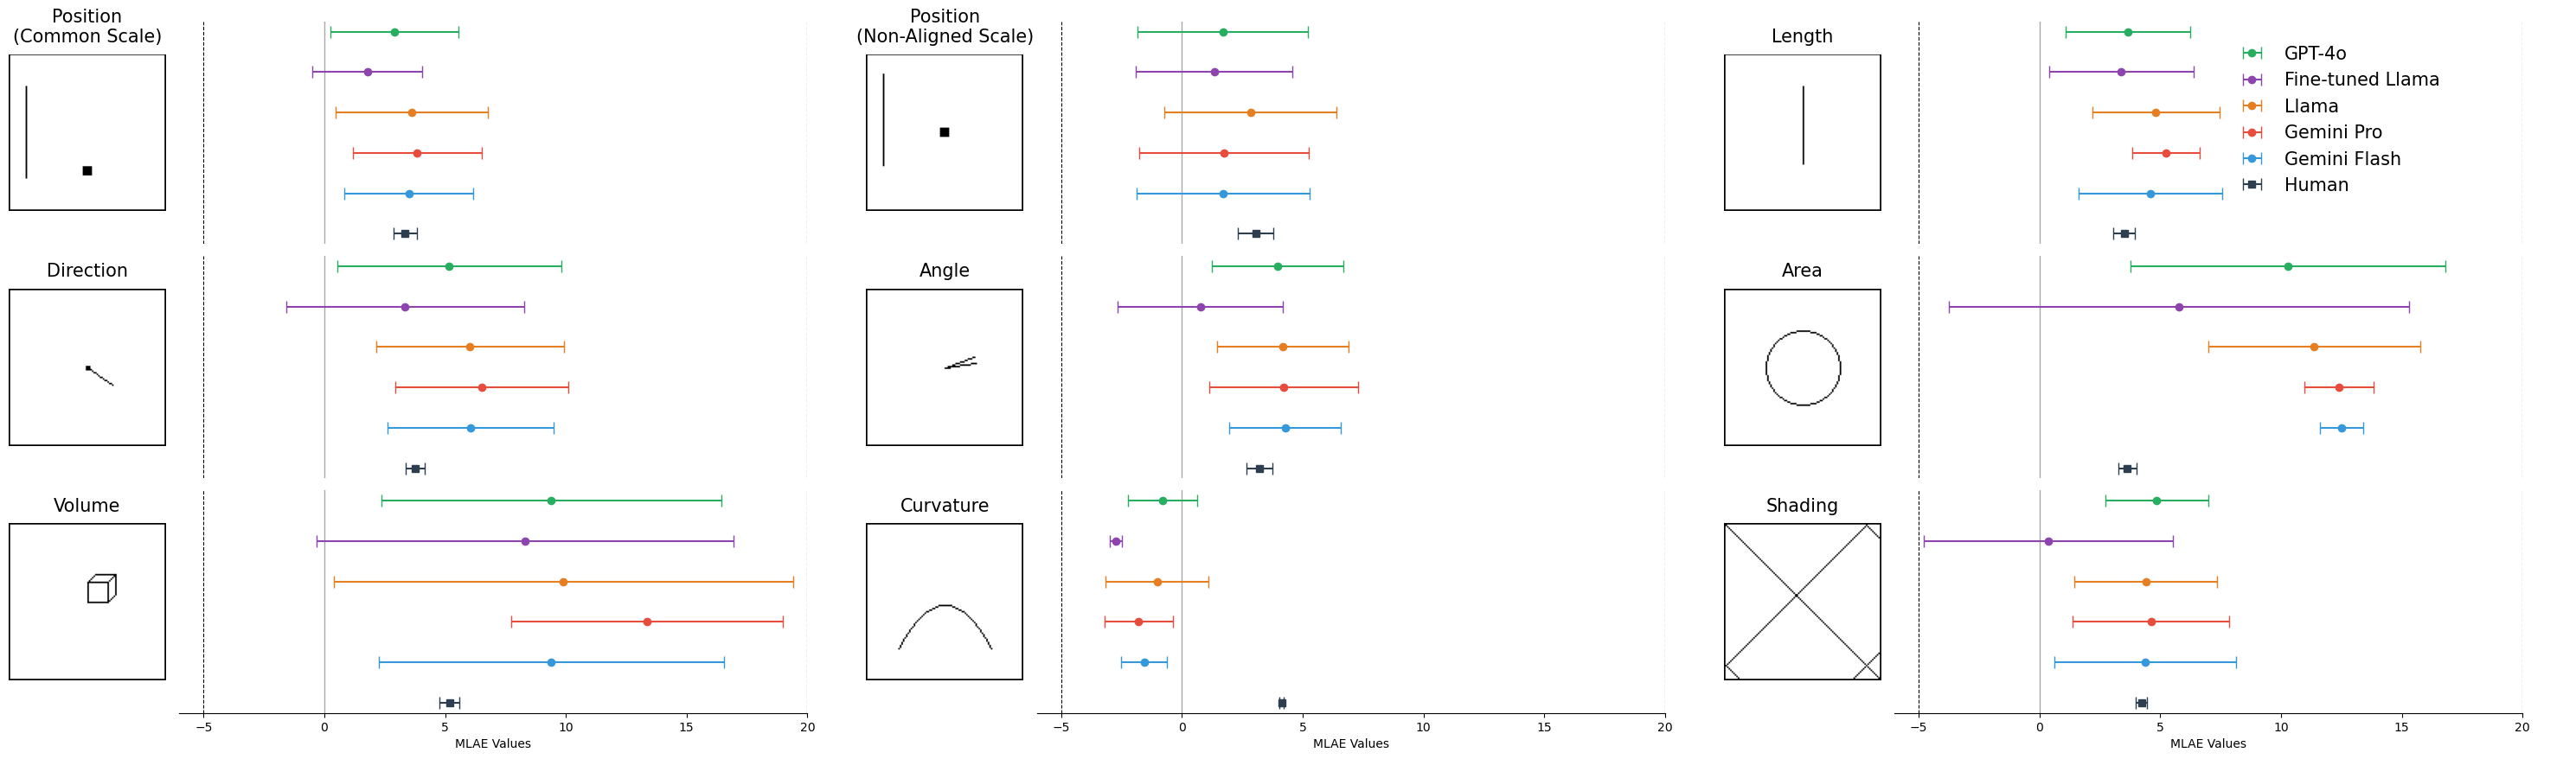

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os
import pandas as pd  # Assuming task data is in a DataFrame

# Base directory for images
base_dir = "."

# Define mappings for renaming tasks and models
task_name_mapping = {
    'direction': 'Direction',
    'length': 'Length',
    'position_common_scale': 'Position\n(Common Scale)',
    'position_non_aligned_scale': 'Position\n(Non-Aligned Scale)',
    'angle': 'Angle',
    'area': 'Area',
    'volume': 'Volume',
    'curvature': 'Curvature',
    'shading': 'Shading'
}

model_name_mapping = {
    'gpt4o': 'GPT-4o',
    'CustomLLaMA': 'Fine-tuned Llama',
    'LLaMA': 'Llama',
    'GeminiProVision': 'Gemini Pro',
    'Gemini1_5Flash': 'Gemini Flash',
    'Human': 'Human'
}

# Assign colors to models
model_colors = {
    model_name_mapping['gpt4o']: '#27AE60',  # Green
    model_name_mapping['CustomLLaMA']: '#8E44AD',  # Purple
    model_name_mapping['LLaMA']: '#E67E22',  # Orange
    model_name_mapping['GeminiProVision']: '#E74C3C',  # Red
    model_name_mapping['Gemini1_5Flash']: '#3498DB',  # Blue
    model_name_mapping['Human']: '#2C3E50'  # Dark color for Human data points
}

# Define human data points
human_data = {
    'Angle': (3.22, 0.54),
    'Area': (3.64, 0.38),
    'Volume': (5.18, 0.40),
    'Curvature': (4.13, 0.10),
    'Shading': (4.22, 0.23),
    'Position\n(Common Scale)': (3.35, 0.49),
    'Position\n(Non-Aligned Scale)': (3.06, 0.74),
    'Length': (3.51, 0.44),
    'Direction': (3.75, 0.39)
}

# Custom task order
custom_task_order = [
    'position_common_scale',
    'position_non_aligned_scale',
    'length',
    'direction',
    'angle',
    'area', 
    'volume', 
    'curvature', 
    'shading'
]

# Reorder summary_stats_by_task based on the custom order
summary_stats_by_task = {task: summary_stats_by_task[task] for task in custom_task_order}

# Set the number of rows and columns for the grid
ncols = 3  # Number of columns
nrows = int(np.ceil(len(summary_stats_by_task) / ncols))  # Calculate rows needed

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols * 3,  # Adjust columns based on layout
    figsize=(30, 3 * nrows),
    gridspec_kw={'width_ratios': [1, 4, 0.2] * ncols},  # Adjust ratios to reduce spacing
    sharex=False
)

# Adjust layout for legend and spacing
fig.subplots_adjust(hspace=0.5, wspace=0.5, left=0.05, right=0.85, top=0.95, bottom=0.05)
fig.patch.set_facecolor('white')

# Flatten the axes array for easier access
axes = axes.reshape(-1, 3)

# Customize plot appearance for x and y ticks
for i, (task_name, task_data) in enumerate(summary_stats_by_task.items()):
    ax_img, ax_plot, ax_label = axes[i]

    # Remove y-axis ticks
    ax_plot.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

    # Add reference lines at -5, 0, and 20
    ax_plot.axvline(x=-5, color='black', linestyle='--', linewidth=0.8)  # Black line at -5
    ax_plot.axvline(x=0, color='darkgray', linestyle='-', linewidth=1.0)  # Dark gray line at 0
    ax_plot.axvline(x=20, color='black', linestyle='--', linewidth=0.8)  # Black line at 20

    # Hide x-axis ticks and labels for all but the bottom row
    if i < len(summary_stats_by_task) - ncols:  # Not the bottom row
        ax_plot.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
    else:  # Bottom row
        ax_plot.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
        ax_plot.set_xlabel("MLAE Values", fontsize=10)  # Optional x-axis label for context

    # Set x-axis limits
    ax_plot.set_xlim(-5, 20)

    # Remove grid and spines for y-axis
    ax_plot.spines['left'].set_visible(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    
    # Remove the middle horizontal (bottom) spine for plots that are not the last row
    if i < len(summary_stats_by_task) - ncols:  # Not the bottom row
        ax_plot.spines['bottom'].set_visible(False)  # Hide the bottom spine

    # Get the updated task name
    updated_task_name = task_name_mapping.get(task_name, task_name)

    # Construct image path dynamically
    img_folder = os.path.join(base_dir, task_name)
    img_path = os.path.join(img_folder, f"{task_name}_image_1.png")

    # Display task image
    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).convert("L")
            img_inverted = ImageOps.invert(img)
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            ax_img.imshow(img_with_border)
            ax_img.axis('off')
        except Exception as e:
            ax_img.text(0.5, 0.5, f"Error displaying image: {e}", ha="center", va="center",
                        fontsize=10, color="black")
            ax_img.set_facecolor("white")
    else:
        ax_img.text(0.5, 0.5, f"Image not found:\n{img_path}", ha="center", va="center",
                    fontsize=10, color="black")
        ax_img.set_facecolor("white")

    # Sort models and plot MLAE with error bars
    sorted_model_names = [name for name in ['gpt4o', 'CustomLLaMA', 'LLaMA', 'GeminiProVision', 'Gemini1_5Flash']
                          if name in task_data['Model'].unique()]
    y_positions = np.arange(len(sorted_model_names) + 1)  # +1 for Human data

    for j, model_name in enumerate(sorted_model_names):
        mlae_value = task_data.loc[task_data['Model'] == model_name, 'Average MLAE'].values[0]
        confidence_interval = task_data.loc[task_data['Model'] == model_name, 'Confidence Interval (95%)'].values[0]
        updated_model_name = model_name_mapping.get(model_name, model_name)

        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o',
                         color=model_colors.get(updated_model_name, 'gray'), capsize=5,
                         label=updated_model_name if i == 0 else None)

    # Add Human data
    if updated_task_name in human_data:
        human_mlae, human_error = human_data[updated_task_name]
        ax_plot.errorbar(human_mlae, len(sorted_model_names), xerr=human_error, fmt='s',
                         color=model_colors['Human'], capsize=5, label="Human" if i == 0 else None)

    # Customize plot appearance
    ax_plot.grid(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])
    ax_plot.set_xlim(-6, 20)
    ax_plot.invert_yaxis()
    # Adjust title spacing
    ax_img.set_title(
        updated_task_name,
        loc="center",  # Keep the title centered
        fontsize=15,  # Reduce font size
        pad=10,  # Increase padding between title and plot (default is 6)
        color="black"
    )

    # Move model names to the right side
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels([model_name_mapping.get(name, name) for name in sorted_model_names] + ['Human'],
                             fontsize=12)  # Adjust model name size
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)
    ax_label.axis("off")
    
# Adjust layout for a compact design
fig.subplots_adjust(
    hspace=0.3,  # Reduce vertical spacing between rows
    wspace=0.3,  # Reduce horizontal spacing between columns
    left=0.05, 
    right=0.95, 
    top=0.90,  # Adjust top to leave space for the legend
    bottom=0.05
)

# Add legend and move it to the top-right corner
handles, labels = axes[0][1].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc='upper right',  # Position in top-right corner
    bbox_to_anchor=(0.95, 0.95),  # Fine-tune position
    frameon=False,
    fontsize=15,  # Reduce font size
    ncol=1  # Single-column layout
)

plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.0)  # Fine-tune padding
plt.show()
plt.close(fig)

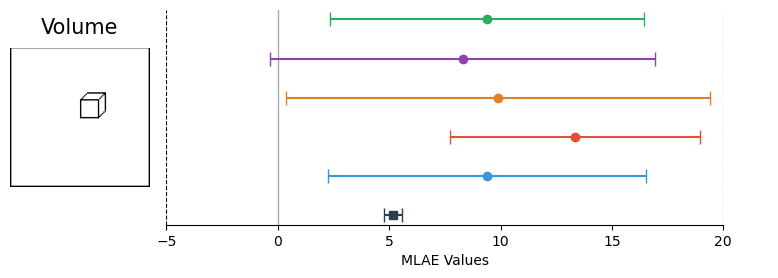

In [53]:
# Filter summary_stats_by_task to include only 'curvature'
summary_stats_by_task = {'volume': summary_stats_by_task['volume']}

# Set the number of rows and columns for the grid
ncols = 1  # Single column since we're only plotting one task
nrows = 1  # Single row for one task

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols * 3,  # Adjust columns based on layout
    figsize=(8, 3),  # Adjust size for a single task
    gridspec_kw={'width_ratios': [1, 4, 0.2]},  # Adjust ratios for spacing
    sharex=False
)

# Adjust layout for legend and spacing
fig.subplots_adjust(hspace=0.5, wspace=0.5, left=0.05, right=0.85, top=0.95, bottom=0.05)
fig.patch.set_facecolor('white')

# Flatten the axes array for easier access
axes = axes.reshape(-1, 3)

# Iterate over 'curvature' task data
for i, (task_name, task_data) in enumerate(summary_stats_by_task.items()):
    ax_img, ax_plot, ax_label = axes[i]

    # Same plotting logic as before for MLAE with error bars and task image
    ax_plot.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax_plot.axvline(x=-5, color='black', linestyle='--', linewidth=0.8)
    ax_plot.axvline(x=0, color='darkgray', linestyle='-', linewidth=1.0)
    ax_plot.axvline(x=20, color='black', linestyle='--', linewidth=0.8)

    if i == 0:  # Only one row
        ax_plot.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
        ax_plot.set_xlabel("MLAE Values", fontsize=10)

    ax_plot.set_xlim(-5, 20)
    ax_plot.spines['left'].set_visible(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)

    updated_task_name = task_name_mapping.get(task_name, task_name)
    img_folder = os.path.join(base_dir, task_name)
    img_path = os.path.join(img_folder, f"{task_name}_image_1.png")

    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).convert("L")
            img_inverted = ImageOps.invert(img)
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            ax_img.imshow(img_with_border)
            ax_img.axis('off')
        except Exception as e:
            ax_img.text(0.5, 0.5, f"Error displaying image: {e}", ha="center", va="center",
                        fontsize=10, color="black")
            ax_img.set_facecolor("white")
    else:
        ax_img.text(0.5, 0.5, f"Image not found:\n{img_path}", ha="center", va="center",
                    fontsize=10, color="black")
        ax_img.set_facecolor("white")

    sorted_model_names = [name for name in ['gpt4o', 'CustomLLaMA', 'LLaMA', 'GeminiProVision', 'Gemini1_5Flash']
                          if name in task_data['Model'].unique()]
    y_positions = np.arange(len(sorted_model_names) + 1)

    for j, model_name in enumerate(sorted_model_names):
        mlae_value = task_data.loc[task_data['Model'] == model_name, 'Average MLAE'].values[0]
        confidence_interval = task_data.loc[task_data['Model'] == model_name, 'Confidence Interval (95%)'].values[0]
        updated_model_name = model_name_mapping.get(model_name, model_name)

        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o',
                         color=model_colors.get(updated_model_name, 'gray'), capsize=5,
                         label=updated_model_name if i == 0 else None)

    if updated_task_name in human_data:
        human_mlae, human_error = human_data[updated_task_name]
        ax_plot.errorbar(human_mlae, len(sorted_model_names), xerr=human_error, fmt='s',
                         color=model_colors['Human'], capsize=5, label="Human" if i == 0 else None)

    ax_plot.grid(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])
    ax_plot.set_xlim(-5, 20)
    ax_plot.invert_yaxis()
    ax_img.set_title(
        updated_task_name,
        loc="center",
        fontsize=15,
        pad=10,
        color="black"
    )
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels([model_name_mapping.get(name, name) for name in sorted_model_names] + ['Human'],
                             fontsize=12)
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)
    ax_label.axis("off")

"""# Adjust layout for compact design
fig.subplots_adjust(hspace=0.3, wspace=0.3, left=0.05, right=0.95, top=0.90, bottom=0.05)
handles, labels = axes[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95),
           frameon=False, fontsize=15, ncol=1)
"""
plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.0)
plt.show()
plt.close(fig)


### Plot for one task 

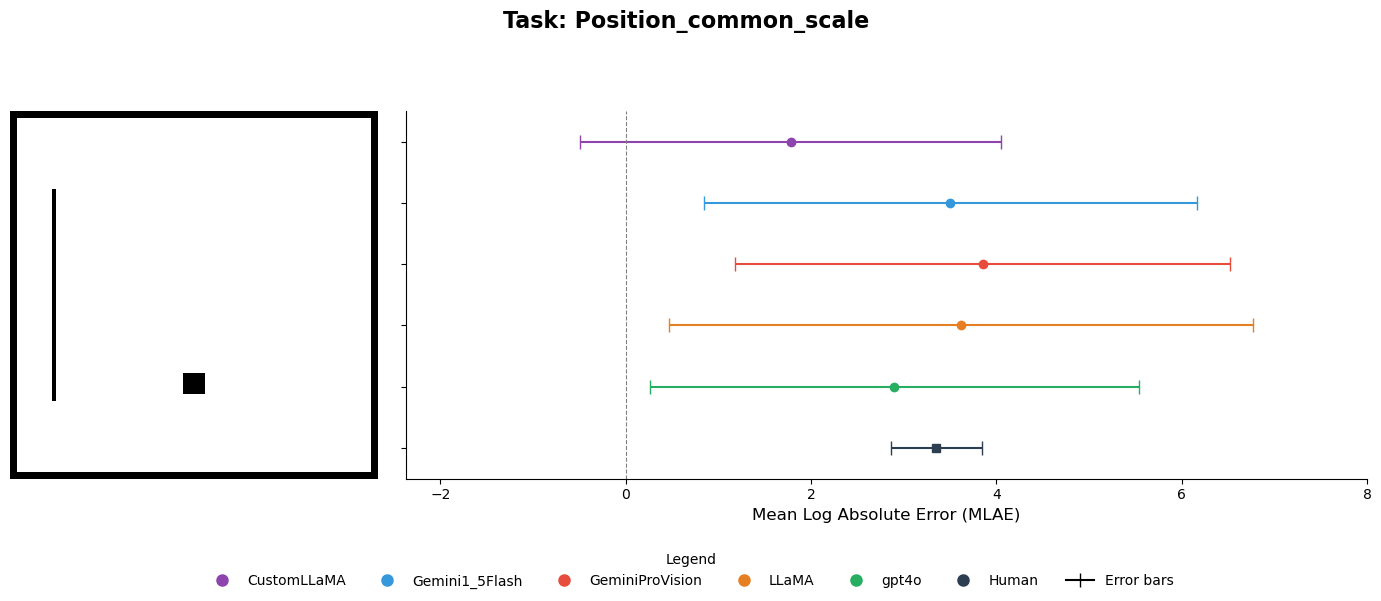

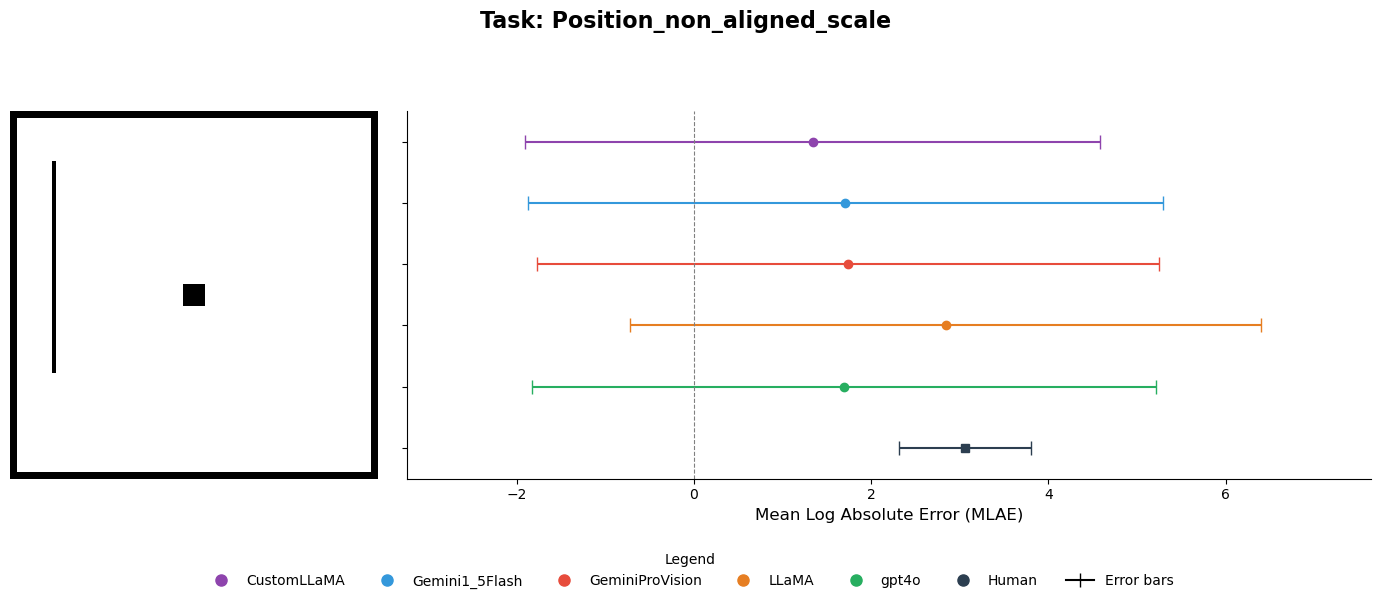

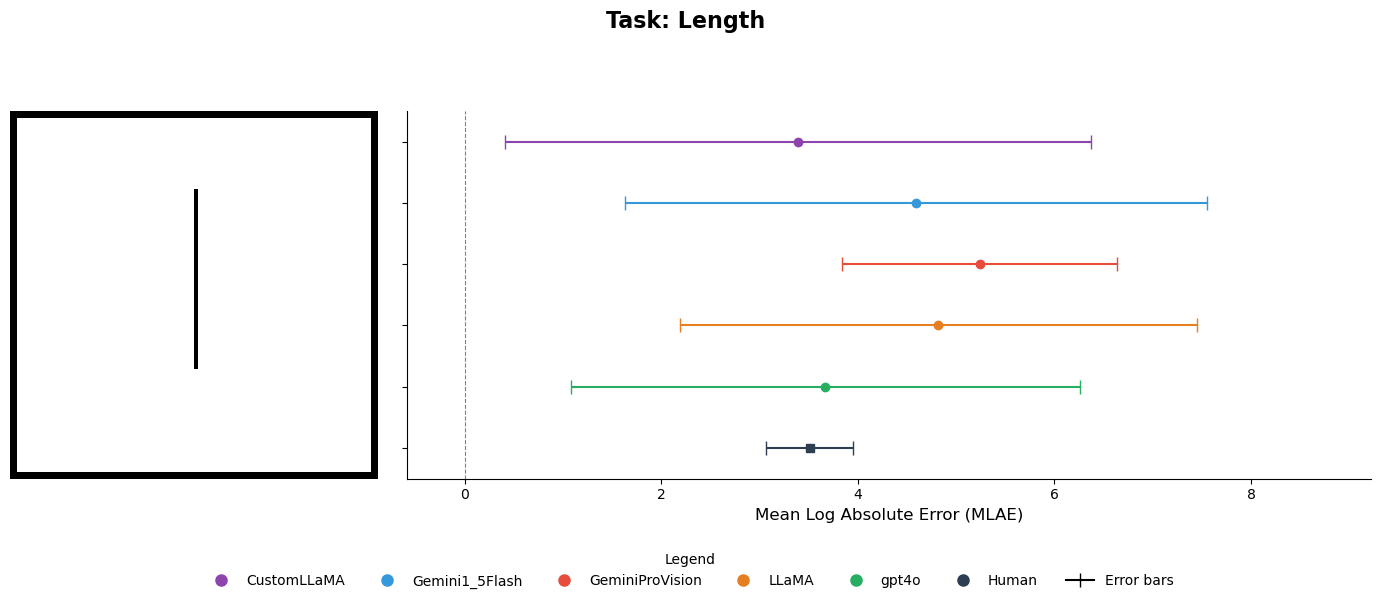

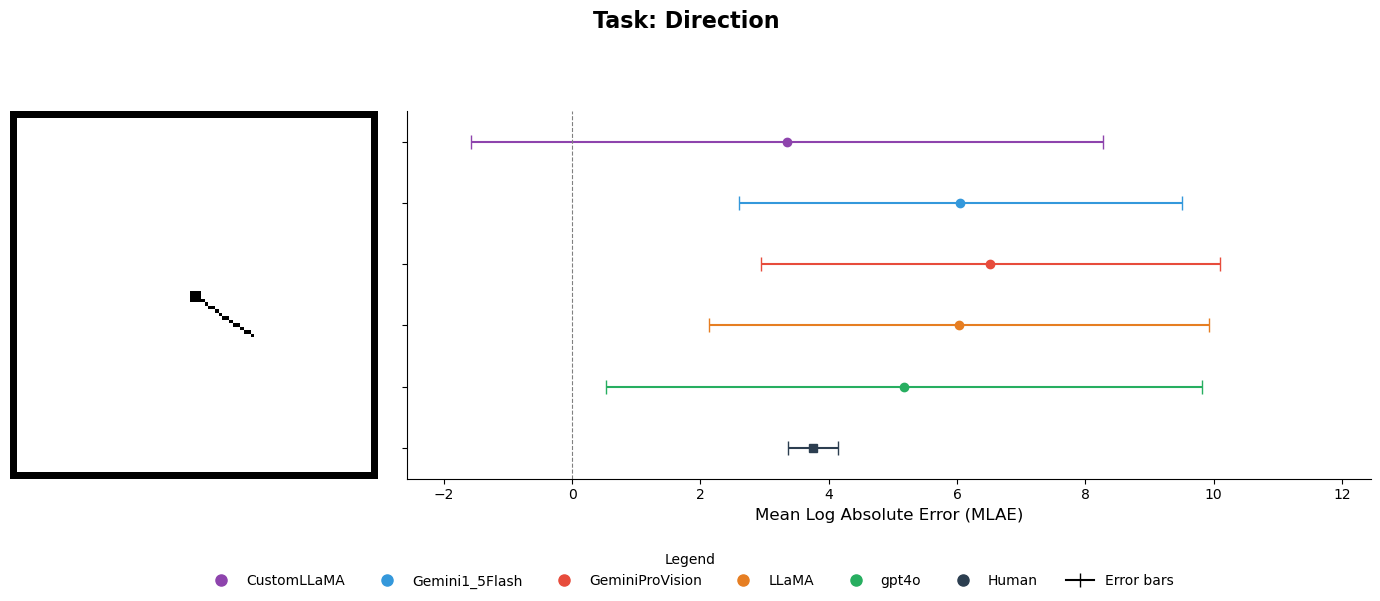

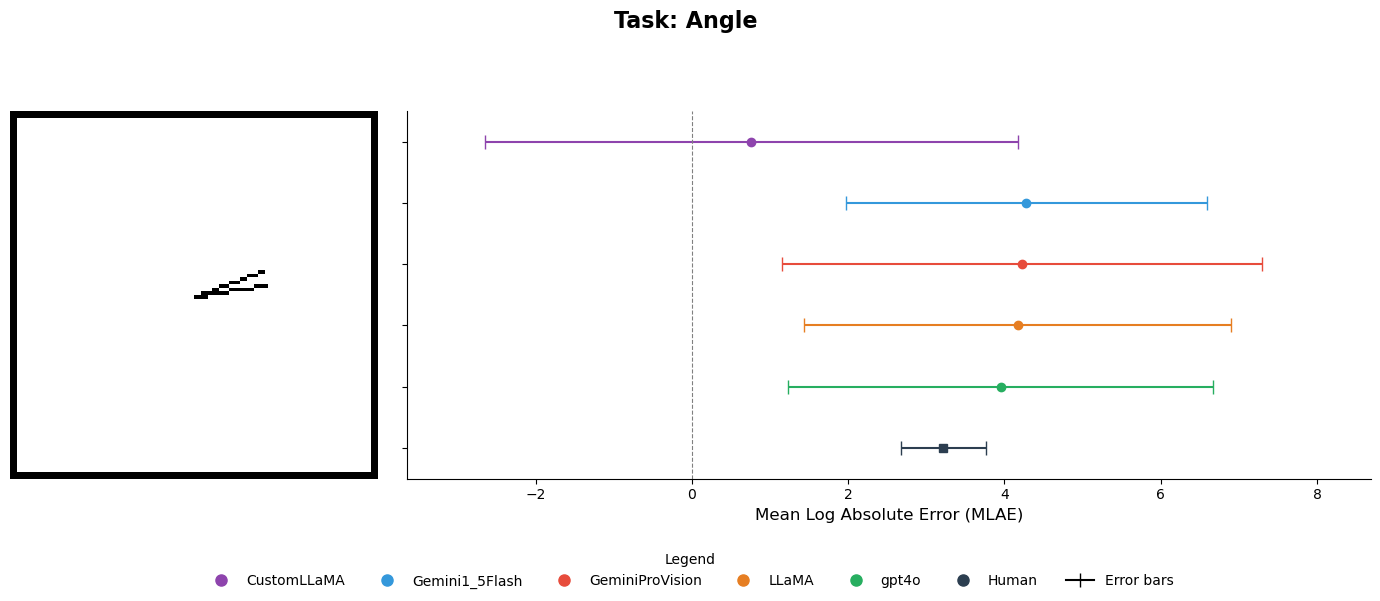

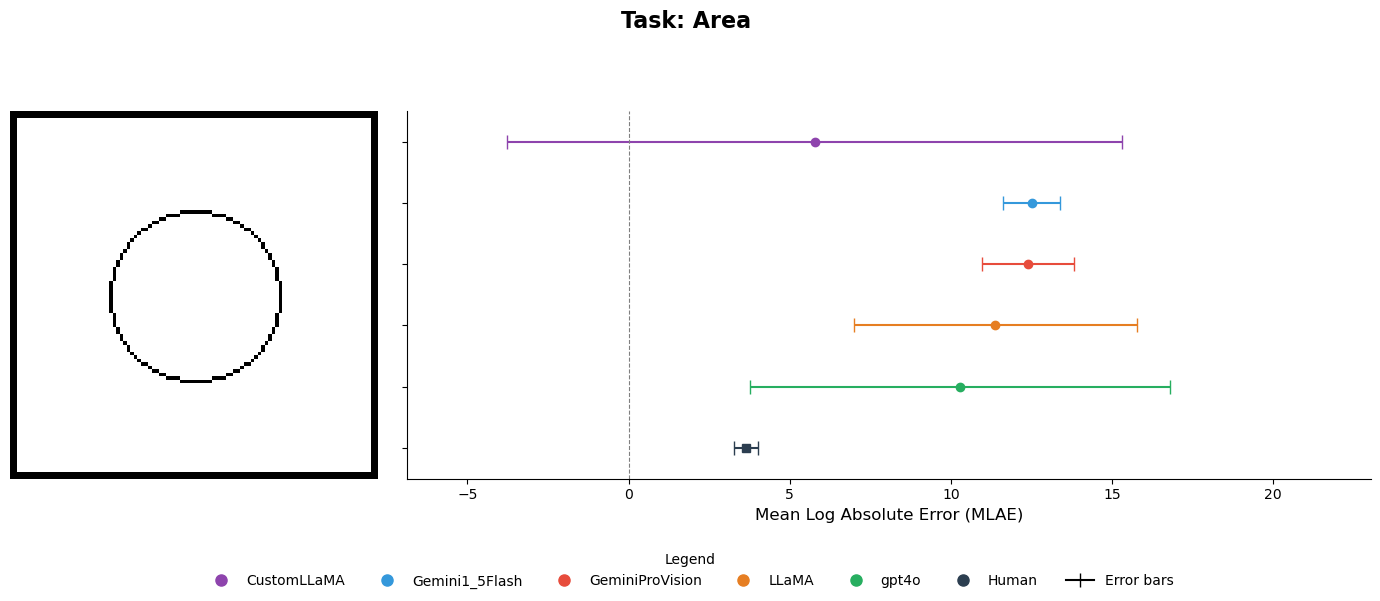

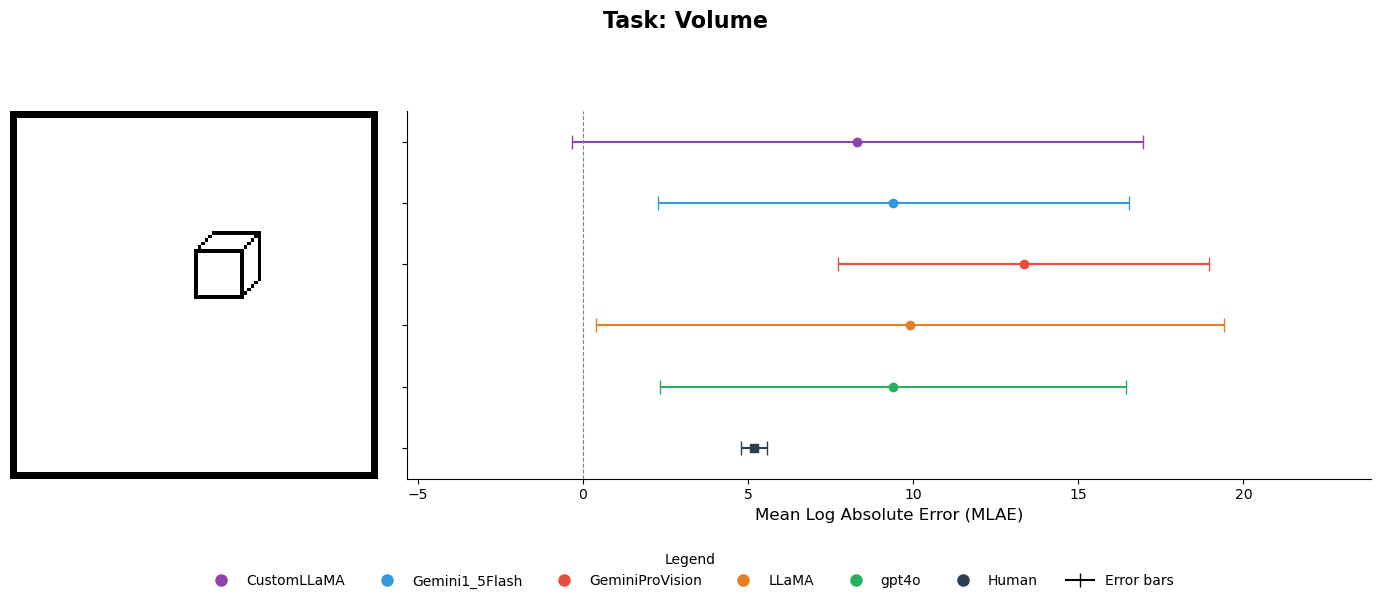

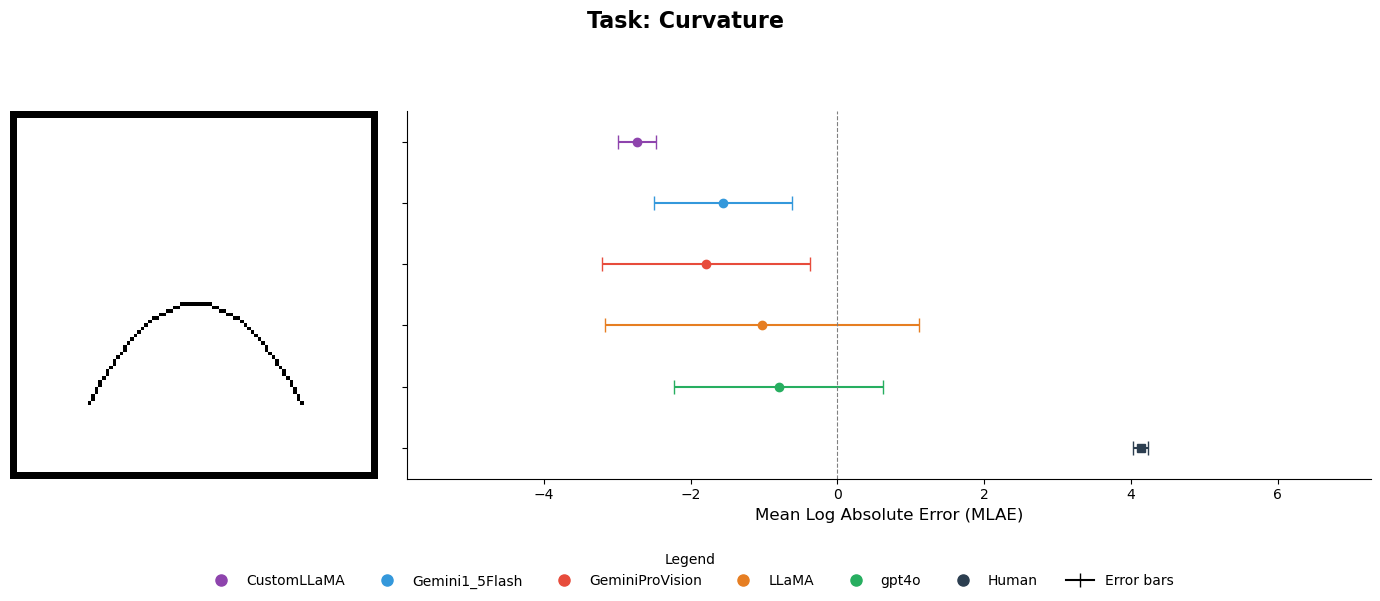

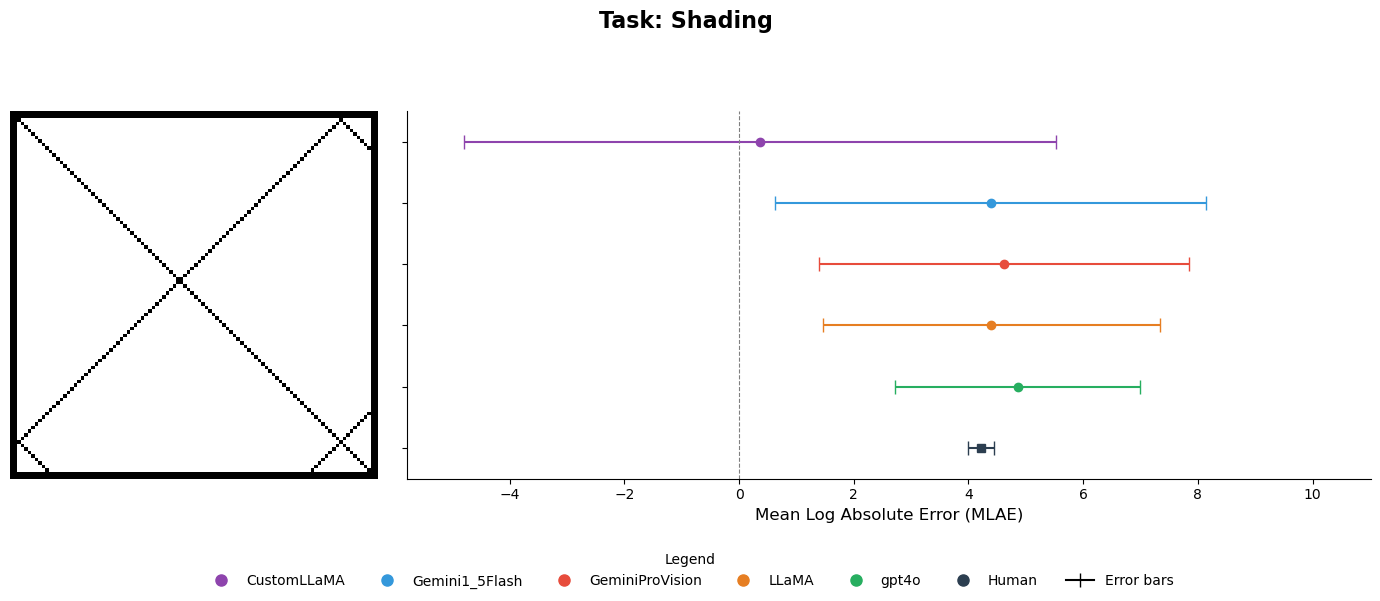

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import os
import matplotlib.lines as mlines

# Define base directory and images
base_dir = "."
task_images = {
    'direction': os.path.join(base_dir, 'direction', 'direction_image_1.png'),
    'length': os.path.join(base_dir, 'length', 'length_image_1.png'),
    'position_common_scale': os.path.join(base_dir, 'position_common_scale', 'position_common_scale_image_1.png'),
    'position_non_aligned_scale': os.path.join(base_dir, 'position_non_aligned_scale', 'position_non_aligned_scale_image_1.png'),
    'angle': os.path.join(base_dir, 'angle', 'angle_image_1.png'),
    'area': os.path.join(base_dir, 'area', 'area_image_1.png'),
    'volume': os.path.join(base_dir, 'volume', 'volume_image_1.png'),
    'curvature': os.path.join(base_dir, 'curvature', 'curvature_image_1.png'),
    'shading': os.path.join(base_dir, 'shading', 'shading_image_1.png')
}

# Colors for models
model_colors = {
    'CustomLLaMA': '#8E44AD',       # Purple
    'Gemini1_5Flash': '#3498DB',    # Blue
    'GeminiProVision': '#E74C3C',   # Red
    'LLaMA': '#E67E22',             # Orange
    'gpt4o': '#27AE60',             # Green
    'Human': '#2C3E50'              # Dark color for Human data points
}

# Human MLAE and error bar data
human_data = {
    'angle': (3.22, 0.54),
    'area': (3.64, 0.38),
    'volume': (5.18, 0.40),
    'curvature': (4.13, 0.10),
    'shading': (4.22, 0.23),
    'position_common_scale': (3.35, 0.49),
    'position_non_aligned_scale': (3.06, 0.74),
    'length': (3.51, 0.44),
    'direction': (3.75, 0.39)
}

def plot_single_task(task_name, task_data):
    fig, (ax_img, ax_plot) = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={'width_ratios': [2, 5]})
    fig.patch.set_facecolor('white')
    fig.suptitle(f"Task: {task_name.capitalize()}", fontsize=16, color="black", fontweight='bold')

    # Display task image
    img_path = task_images.get(task_name)
    if img_path and os.path.exists(img_path):
        img = Image.open(img_path).convert("L")
        img_inverted = ImageOps.invert(img)
        img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=2, fill="black")
        ax_img.imshow(img_with_border)
        ax_img.axis('off')
    else:
        ax_img.text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=12, color="black")
        ax_img.set_facecolor("white")

    # Sort models and set up y positions
    sorted_model_names = sorted(task_data['Model'].unique())
    y_positions = np.arange(len(sorted_model_names) + 1)  # +1 for Human

    # Calculate min and max for MLAE values and confidence intervals
    mlae_values = []
    confidence_intervals = []

    for j, model_name in enumerate(sorted_model_names):
        model_data = task_data[task_data['Model'] == model_name]
        mlae_value = model_data['Average MLAE'].values[0]
        confidence_interval = model_data['Confidence Interval (95%)'].values[0]
        
        mlae_values.append(mlae_value)
        confidence_intervals.append(confidence_interval)
        
        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o', color=model_colors.get(model_name, 'gray'),
                         capsize=5, label=model_name if j == 0 else None)  # Label only once for legend

    # Add human MLAE if available
    if task_name in human_data:
        human_mlae, human_error = human_data[task_name]
        mlae_values.append(human_mlae)
        confidence_intervals.append(human_error)
        
        ax_plot.errorbar(human_mlae, len(sorted_model_names), xerr=human_error, fmt='s', color=model_colors['Human'],
                         capsize=5, label="Human")

    # Dynamically set x-axis limits based on MLAE values and confidence intervals
    max_label = max(mlae_values) + max(confidence_intervals)
    min_label = min(mlae_values) - max(confidence_intervals)
    ax_plot.set_xlim(min_label - 1, max_label + 1)  # Add padding for better visualization

    # Customize ax_plot
    ax_plot.axvline(0, color="gray", linestyle="--", linewidth=0.8)
    ax_plot.set_ylim(-0.5, len(sorted_model_names) + 0.5)
    ax_plot.invert_yaxis()
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])  # Remove y-axis labels
    ax_plot.tick_params(axis='y', which='minor', left=False)  # Hide y-axis minor ticks
    ax_plot.set_xlabel("Mean Log Absolute Error (MLAE)", fontsize=12)

    # Hide plot borders
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)

    # Custom legend with model colors and error bar label
    custom_legend = [mlines.Line2D([], [], color=color, marker='o', linestyle='', markersize=8, label=name)
                     for name, color in model_colors.items()]
    error_bar_legend = mlines.Line2D([], [], color='black', linestyle='-', marker='|', markersize=10, linewidth=1.5, label='Error bars')
    custom_legend.append(error_bar_legend)
    
    fig.legend(handles=custom_legend, loc='lower center', ncol=len(custom_legend), frameon=False, title="Legend", fontsize=10)

    plt.tight_layout(rect=[0, 0.1, 1, 0.9])  # Leave space for legend and title
    plt.show()


def clean_task_name(task_name):
    return task_name.replace("df_", "")

# Use cleaned task name to call the function
for task_name in summary_stats_by_task:
    plot_single_task(clean_task_name(task_name), summary_stats_by_task[task_name])


NameError: name 'task_name_mapping' is not defined

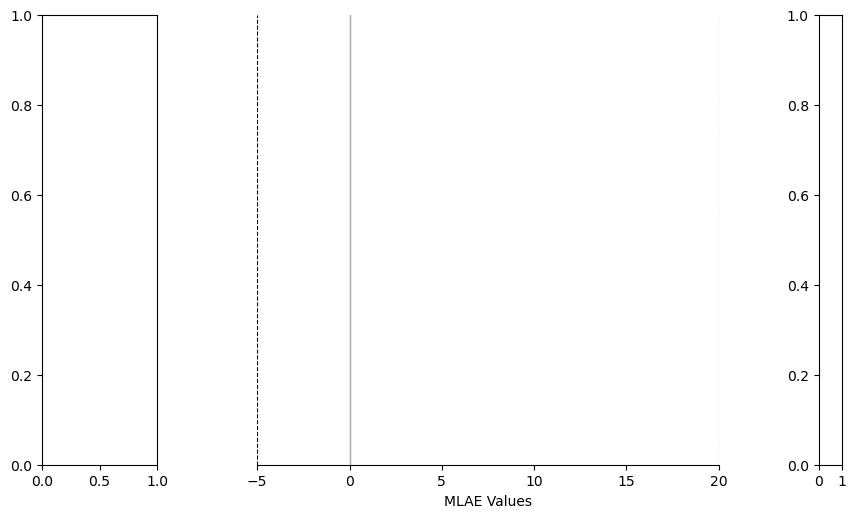

In [19]:
# Filter summary_stats_by_task to include only 'curvature'
summary_stats_by_task = {'area': summary_stats_by_task['area']}

# Set the number of rows and columns for the grid
ncols = 1  # Single column since we're only plotting one task
nrows = 1  # Single row for one task

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols * 3,  # Adjust columns based on layout
    figsize=(10, 5),  # Adjust size for a single task
    gridspec_kw={'width_ratios': [1, 4, 0.2]},  # Adjust ratios for spacing
    sharex=False
)

# Adjust layout for legend and spacing
fig.subplots_adjust(hspace=0.5, wspace=0.5, left=0.05, right=0.85, top=0.95, bottom=0.05)
fig.patch.set_facecolor('white')

# Flatten the axes array for easier access
axes = axes.reshape(-1, 3)

# Iterate over 'curvature' task data
for i, (task_name, task_data) in enumerate(summary_stats_by_task.items()):
    ax_img, ax_plot, ax_label = axes[i]

    # Same plotting logic as before for MLAE with error bars and task image
    ax_plot.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    ax_plot.axvline(x=-5, color='black', linestyle='--', linewidth=0.8)
    ax_plot.axvline(x=0, color='darkgray', linestyle='-', linewidth=1.0)
    ax_plot.axvline(x=20, color='black', linestyle='--', linewidth=0.8)

    if i == 0:  # Only one row
        ax_plot.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
        ax_plot.set_xlabel("MLAE Values", fontsize=10)

    ax_plot.set_xlim(-5, 20)
    ax_plot.spines['left'].set_visible(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)

    updated_task_name = task_name_mapping.get(task_name, task_name)
    img_folder = os.path.join(base_dir, task_name)
    img_path = os.path.join(img_folder, f"{task_name}_image_1.png")

    if os.path.exists(img_path):
        try:
            img = Image.open(img_path).convert("L")
            img_inverted = ImageOps.invert(img)
            img_with_border = ImageOps.expand(img_inverted.convert("RGB"), border=1, fill="black")
            ax_img.imshow(img_with_border)
            ax_img.axis('off')
        except Exception as e:
            ax_img.text(0.5, 0.5, f"Error displaying image: {e}", ha="center", va="center",
                        fontsize=10, color="black")
            ax_img.set_facecolor("white")
    else:
        ax_img.text(0.5, 0.5, f"Image not found:\n{img_path}", ha="center", va="center",
                    fontsize=10, color="black")
        ax_img.set_facecolor("white")

    sorted_model_names = [name for name in ['gpt4o', 'CustomLLaMA', 'LLaMA', 'GeminiProVision', 'Gemini1_5Flash']
                          if name in task_data['Model'].unique()]
    y_positions = np.arange(len(sorted_model_names) + 1)

    for j, model_name in enumerate(sorted_model_names):
        mlae_value = task_data.loc[task_data['Model'] == model_name, 'Average MLAE'].values[0]
        confidence_interval = task_data.loc[task_data['Model'] == model_name, 'Confidence Interval (95%)'].values[0]
        updated_model_name = model_name_mapping.get(model_name, model_name)

        ax_plot.errorbar(mlae_value, j, xerr=confidence_interval, fmt='o',
                         color=model_colors.get(updated_model_name, 'gray'), capsize=5,
                         label=updated_model_name if i == 0 else None)

    if updated_task_name in human_data:
        human_mlae, human_error = human_data[updated_task_name]
        ax_plot.errorbar(human_mlae, len(sorted_model_names), xerr=human_error, fmt='s',
                         color=model_colors['Human'], capsize=5, label="Human" if i == 0 else None)

    ax_plot.grid(False)
    ax_plot.spines['top'].set_visible(False)
    ax_plot.spines['right'].set_visible(False)
    ax_plot.set_yticks(y_positions)
    ax_plot.set_yticklabels([])
    ax_plot.set_xlim(-6, 20)
    ax_plot.invert_yaxis()
    ax_img.set_title(
        updated_task_name,
        loc="center",
        fontsize=15,
        pad=10,
        color="black"
    )
    ax_label.set_yticks(y_positions)
    ax_label.set_yticklabels([model_name_mapping.get(name, name) for name in sorted_model_names] + ['Human'],
                             fontsize=12)
    ax_label.tick_params(left=False, right=False, labelleft=False, labelright=True)
    ax_label.axis("off")

# Adjust layout for compact design
fig.subplots_adjust(hspace=0.3, wspace=0.3, left=0.05, right=0.95, top=0.90, bottom=0.05)
handles, labels = axes[0][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.95, 0.95),
           frameon=False, fontsize=15, ncol=1)

output_file = "Figure_Curvature_MLAE.png"
fig.savefig(output_file, format='png', bbox_inches='tight', dpi=1200)
print(f"Figure saved as {output_file}")

plt.tight_layout(pad=1.5, w_pad=0.5, h_pad=1.0)
plt.show()
plt.close(fig)


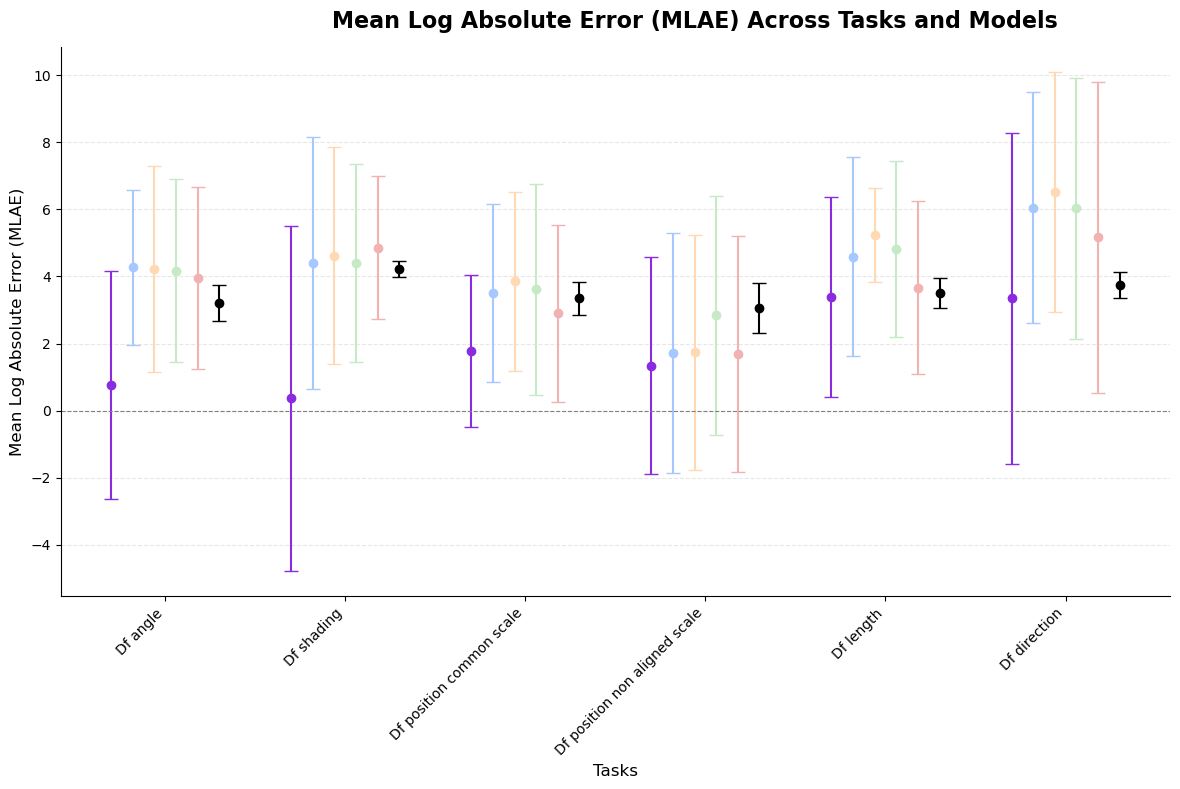

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats


# Step 1: Calculate Metrics and Build Data
def calculate_metrics(dataframes, human_data):
    """Calculate MLAE and other metrics for all datasets and add human data."""
    # Dictionary to store metrics for each dataset
    metrics_summary = {}

    for df_name, df in dataframes.items():
        # Dictionary to store metrics for each model within the current DataFrame
        model_metrics = {}
        
        # Group by `model_name` and calculate metrics for each model within the dataset
        for model_name, data in df.groupby('model_name'):
            # Ensure `ground_truth` and `parsed_answers` columns are numeric
            data['ground_truth'] = pd.to_numeric(data['ground_truth'], errors='coerce')
            data['parsed_answers'] = pd.to_numeric(data['parsed_answers'], errors='coerce')
            
            # Drop rows with NaN
            data = data.dropna(subset=['ground_truth', 'parsed_answers'])
            
            # Calculate MLAE
            data['mlae'] = data.apply(
                lambda row: np.log2(mean_absolute_error([row['ground_truth']], [row['parsed_answers']]) + 0.125),
                axis=1
            )
            
            # Bootstrap confidence interval for MLAE
            mlae_values = data['mlae'].dropna().values
            bootstrap_result = bs.bootstrap(np.array(mlae_values), stat_func=bs_stats.std)
            confidence_value = 1.96 * bootstrap_result.value  # 95% confidence interval

            # Store metrics in the model_metrics dictionary
            model_metrics[model_name] = {
                'Dataset': df_name,
                'Model': model_name,
                'Average MLAE': round(data['mlae'].mean(), 2),
                'Confidence Interval (95%)': round(confidence_value, 2)
            }
        
        # Store model metrics for the current dataset
        metrics_summary[df_name] = model_metrics

    # Step 2: Convert the nested metrics_summary dictionary to a DataFrame
    metrics_table = pd.DataFrame([
        metrics for dataset_metrics in metrics_summary.values() for metrics in dataset_metrics.values()
    ])
    
    # Step 3: Integrate Human Data
    summary_stats_by_task = {}
    for task, human_values in human_data.items():
        task_data = metrics_table[metrics_table['Dataset'] == task].copy()
        if not task_data.empty:
            # Add Human 1
            task_data = pd.concat([
                task_data,
                pd.DataFrame({
                    'Model': ['Human 1'],
                    'Average MLAE': [human_values[0]],
                    'Confidence Interval (95%)': [human_values[1]]
                })
            ], ignore_index=True)
        summary_stats_by_task[task] = task_data

    return summary_stats_by_task


def plot_custom_design(summary_stats_by_task):
    """Generate the MLAE plot."""
    # Extract all model names and task names
    all_models = ['CustomLLaMA', 'Gemini1_5Flash', 'GeminiProVision', 'LLaMA', 'gpt4o', 'Human 1']
    all_tasks = list(summary_stats_by_task.keys())
    task_positions = np.arange(len(all_tasks))

    # Define custom colors for models
    model_colors = {
        'CustomLLaMA': '#8a2be2',
        'Gemini1_5Flash': '#a6c8ff',
        'GeminiProVision': '#ffd9b3',
        'LLaMA': '#c5eac5',
        'gpt4o': '#f2b2b2',
        'Human 1': '#000000'
    }

    # Define offsets for separating models
    num_models = len(all_models)
    offset = 0.1
    offsets = np.linspace(-offset * num_models / 2, offset * num_models / 2, num_models)

    # Create figure
    fig, ax = plt.subplots(figsize=(14, 8))
    fig.patch.set_facecolor('white')
    fig.suptitle("Mean Log Absolute Error (MLAE) Across Tasks and Models", fontsize=16, fontweight='bold')

    # Plot MLAE for each model across tasks
    for i, model_name in enumerate(all_models):
        mlae_values = []
        confidence_intervals = []
        for task_name in all_tasks:
            task_data = summary_stats_by_task[task_name]
            if model_name in task_data['Model'].values:
                model_data = task_data[task_data['Model'] == model_name]
                mlae_values.append(model_data['Average MLAE'].values[0])
                confidence_intervals.append(model_data['Confidence Interval (95%)'].values[0])
            else:
                mlae_values.append(None)
                confidence_intervals.append(None)

        # Plot points and error bars
        for j, (mlae, ci) in enumerate(zip(mlae_values, confidence_intervals)):
            if mlae is not None:
                ax.errorbar(
                    task_positions[j] + offsets[i],
                    mlae,
                    yerr=ci,
                    fmt='o', color=model_colors[model_name], capsize=5,
                    label='Fine-tuned Llama' if model_name == 'CustomLLaMA' and j == 0 else None
                )

    # Customize plot
    ax.axhline(0, color="gray", linestyle="--", linewidth=0.8)
    ax.set_xticks(task_positions)
    ax.set_xticklabels([task.replace('_', ' ').capitalize() for task in all_tasks], rotation=45, ha="right", fontsize=10)
    ax.set_xlabel("Tasks", fontsize=12)
    ax.set_ylabel("Mean Log Absolute Error (MLAE)", fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)
    ax.set_axisbelow(True)

    """
    # Add vertical legend styled like the image
    handles = [
        plt.Line2D([0], [0], color=color, marker='o', markersize=8, linestyle='-', linewidth=2, label=model_name)
        for model_name, color in model_colors.items()
    ]
    legend = ax.legend(
        handles=handles,
        bbox_to_anchor=(1.2, 0.5),  # Place legend to the right of the plot
        loc='center left',  # Center vertically, left-aligned
        frameon=True,  # Add a frame around the legend
        fontsize=10,
        title="Model",
        title_fontsize=12
    )

    # Customize the legend frame
    legend.get_frame().set_edgecolor('gray')  # Light gray border
    legend.get_frame().set_linewidth(1)  # Set frame line width

    """

    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to accommodate the legend
    return fig, ax



human_data = {
    'df_angle': (3.22, 0.54),
    'df_shading': (4.22, 0.23),
    'df_position_common_scale': (3.35, 0.49),
    'df_position_non_aligned_scale': (3.06, 0.74),
    'df_length': (3.51, 0.44),
    'df_direction': (3.75, 0.39)
}

# Process metrics and generate plot
summary_stats_by_task = calculate_metrics(dataframes, human_data)
fig, ax = plot_custom_design(summary_stats_by_task)
plt.show()


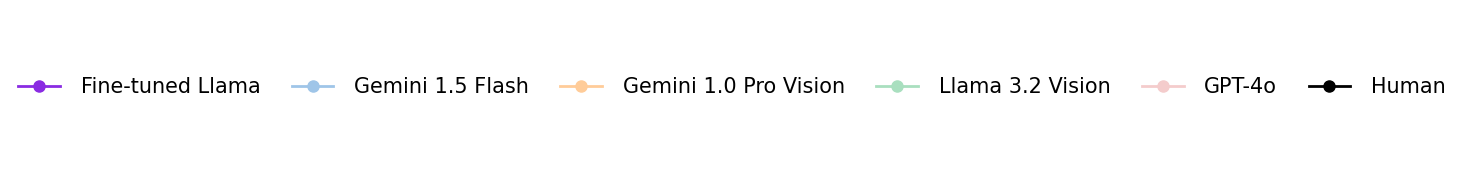

In [63]:
import matplotlib.pyplot as plt

# Define custom colors for models
model_colors = {
    'Fine-tuned Llama': '#8a2be2',  # Purple
    'Gemini 1.5 Flash': '#9fc5e8',  # Light Blue
    'Gemini 1.0 Pro Vision': '#ffcc99',  # Light Orange
    'Llama 3.2 Vision': '#a9dfbf',  # Light Green
    'GPT-4o': '#f4cccc',  # Light Red
    'Human': '#000000'  # Black
}

# Create handles for the legend
handles = [
    plt.Line2D([0], [0], color=color, marker='o', markersize=8, linestyle='-', linewidth=2, label=label)
    for label, color in model_colors.items()
]

# Create a figure for the legend only
fig = plt.figure(figsize=(10, 2))  # Adjust size for horizontal layout
ax = fig.add_subplot(111)

# Hide axes
ax.axis('off')

# Add the legend
legend = ax.legend(
    handles=handles,
    loc='center',  # Center the legend
    frameon=False,  # Remove the box
    fontsize=15,  # Font size for labels
    ncol=len(model_colors),  # Arrange all items in a single row
    columnspacing=1.5,  # Space between columns
    handletextpad=1,  # Space between markers and text
)

# Display the figure
plt.show()


In [58]:
def check_data(summary_stats_by_task):
    print("=== Checking Task Names and Model Names ===")
    
    # List all task names
    print("\nTask Names:")
    for task_name in summary_stats_by_task.keys():
        print(f" - {task_name}")
    
    # Check model names for each task
    print("\nModel Names by Task:")
    for task_name, task_data in summary_stats_by_task.items():
        print(f"Task: {task_name}")
        print("  Models:", task_data['Model'].unique())  # List unique model names

# Example: Call the function with your data
check_data(summary_stats_by_task)


=== Checking Task Names and Model Names ===

Task Names:
 - df_direction
 - df_length
 - df_position_common_scale
 - df_position_non_aligned_scale
 - df_angle
 - df_area
 - df_volume
 - df_curvature
 - df_shading

Model Names by Task:
Task: df_direction
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_length
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_position_common_scale
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_position_non_aligned_scale
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_angle
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_area
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_volume
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 'LLaMA' 'gpt4o']
Task: df_curvature
  Models: ['CustomLLaMA' 'Gemini1_5Flash' 'GeminiProVision' 

### 7. Filter and sort model data and caculate for each model

In [8]:
def filter_and_sort_df(df, model_name="all"):
    """
    Filter and sort the df DataFrame by model name, removing '.0' for integer values.
    
    Parameters:
    - df: pandas.DataFrame, the DataFrame to filter and sort
    - model_name: str, specific model name to filter or "all" for all models
    
    Returns:
    - pandas.DataFrame: The filtered and sorted DataFrame without styling
    """
    # Filter by model name or select all
    if model_name != "all":
        filtered_df = df[df['model_name'] == model_name]
    else:
        filtered_df = df

    # Sort by 'ground_truth' and 'parsed_answers'
    filtered_sorted_df = filtered_df.sort_values(by=['ground_truth', 'parsed_answers'])
    
    # Convert 'ground_truth' and 'parsed_answers' to integer if they are whole numbers
    filtered_sorted_df['ground_truth'] = filtered_sorted_df['ground_truth'].apply(
        lambda x: int(float(x)) if float(x).is_integer() else float(x)
    )
    filtered_sorted_df['parsed_answers'] = filtered_sorted_df['parsed_answers'].apply(
        lambda x: int(float(x)) if float(x).is_integer() else float(x)
    )

    return filtered_sorted_df[['ground_truth', 'parsed_answers', 'model_name']]



### 8. Display 20 images for each task

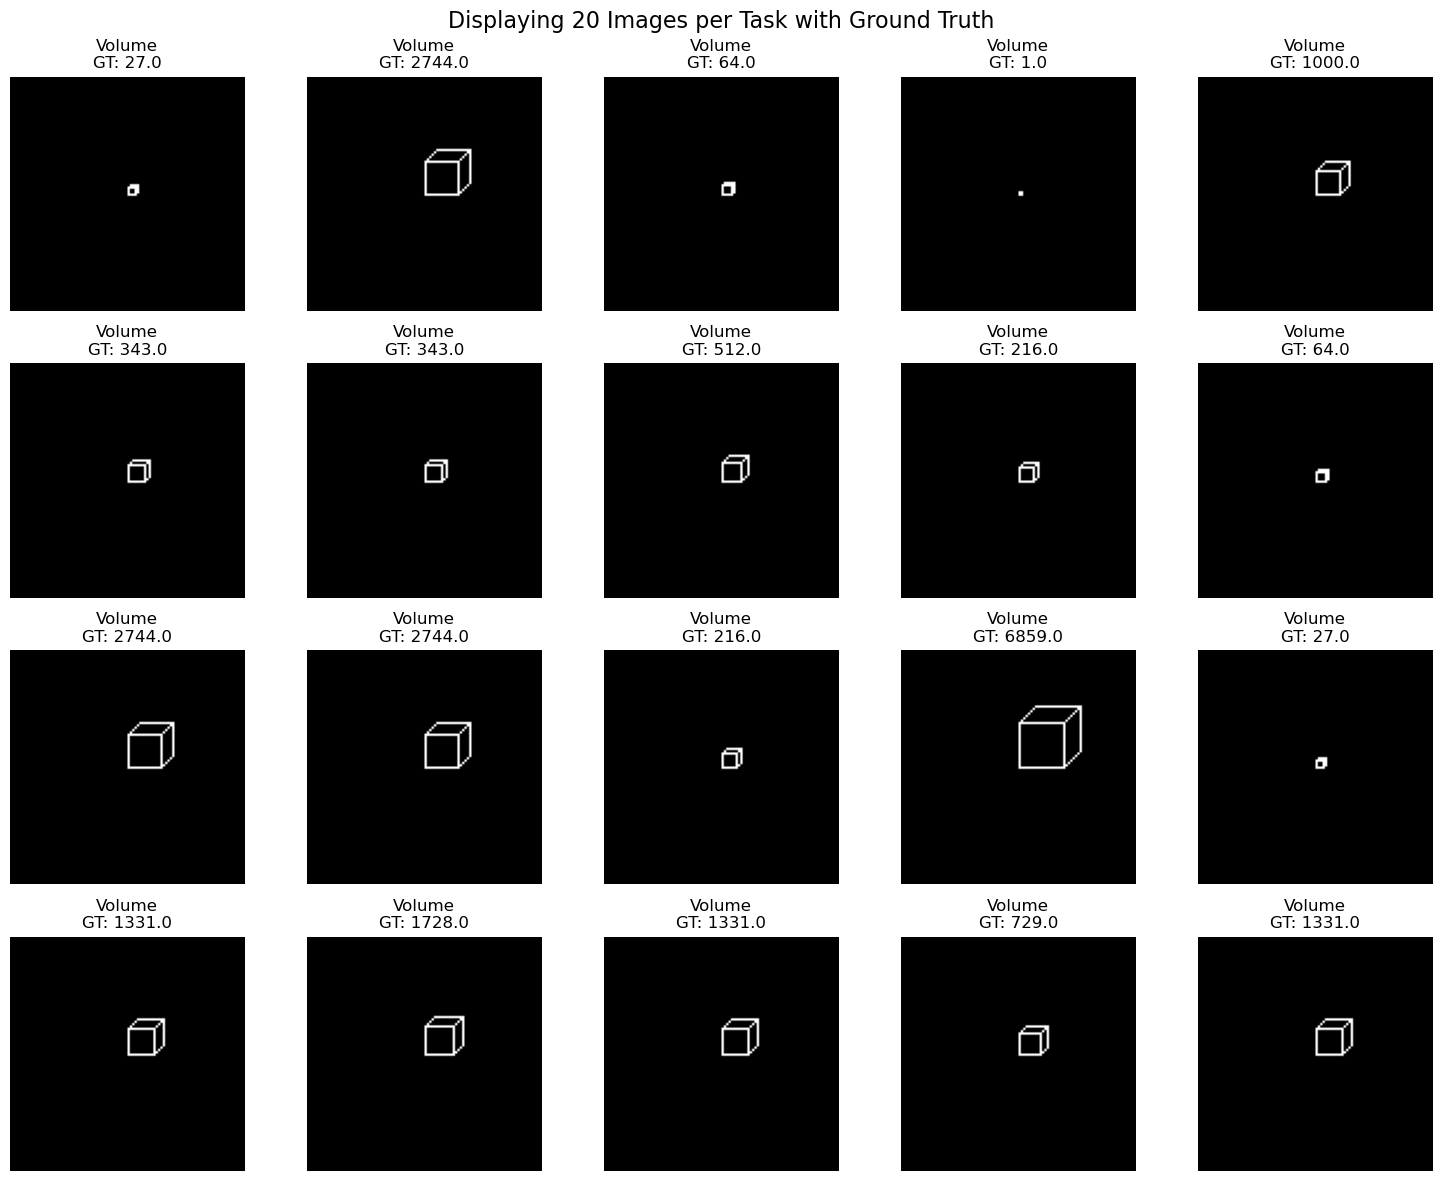

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Define the base folder where images are located
base_folder = "."

# Task selection for quick customization
# Define the number of images per task to display and specify the tasks to show
num_images = 20  # Number of images to display per task
tasks = ["volume"]  # Example: choose specific tasks or set to "all" for all tasks

csv_files = {
    'direction': './direction_results.csv', 
    'length': './length_results.csv', 
    'position_common_scale': './position_common_scale_results.csv', 
    'position_non_aligned_scale': './position_non_aligned_scale_results.csv',
    'angle': './angle_results.csv',
    'area': './area_results.csv',
    'volume': './volume_results.csv',
    'curvature': './curvature_results.csv',
    'shading': './shading_results.csv'
}
def display_images(num_images, tasks="all"):
    # Use all tasks if 'tasks' parameter is "all"
    selected_tasks = list(csv_files.keys()) if tasks == "all" else tasks

    # Calculate total number of subplots needed
    total_images = len(selected_tasks) * num_images
    num_cols = 5
    num_rows = (total_images + num_cols - 1) // num_cols  # Automatically adjust rows

    # Create figure with subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
    fig.suptitle(f"Displaying {num_images} Images per Task with Ground Truth", fontsize=16)
    
    # Flatten axes for easy iteration
    axes = axes.flatten()

    plot_idx = 0  # To keep track of the current subplot index
    for task in selected_tasks:
        # Check if the CSV file exists for the task
        csv_file = csv_files.get(task)
        if not os.path.exists(csv_file):
            print(f"CSV file not found: {csv_file}")
            continue

        # Load CSV data
        results_df = pd.read_csv(csv_file)

        # Limit to num_images or the number of rows in the CSV, whichever is smaller
        num_to_display = min(num_images, len(results_df))

        # Loop to display each image for the task
        for i in range(num_to_display):
            if plot_idx >= num_rows * num_cols:
                break
            
            # Get the row data and image path
            row = results_df.iloc[i]
            image_filename = os.path.basename(row["image_path"])
            image_path = os.path.join(base_folder, task, image_filename)
            ground_truth = row["ground_truth"]

            # Display image if exists, else show 'Image not found'
            if os.path.exists(image_path):
                img = Image.open(image_path)
                axes[plot_idx].imshow(img, cmap="gray")
                axes[plot_idx].set_title(f"{task.capitalize()}\nGT: {ground_truth}")
            else:
                print(f"Image not found: {image_path}")
                axes[plot_idx].set_title(f"{task.capitalize()}\nImage not found")

            axes[plot_idx].axis("off")
            plot_idx += 1

    # Hide any remaining empty subplots
    for j in range(plot_idx, num_rows * num_cols):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

# Call the function with the specified number of images and tasks
display_images(num_images, tasks)


In [73]:
df_volume

# Set display options to show all rows and all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Set to None to display full cell content


In [7]:
import pandas as pd
import os

def filter_sort_and_group_df(df, model_name='CustomLLaMA', base_folder=''):
    """
    Filters, sorts, and groups a DataFrame for a specific model name,
    then aggregates parsed answers by ground_truth and adds the full path for images.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.
    - model_name (str): The model name to filter on, default is 'CustomLLaMA'.
    - base_folder (str): The base folder path to prepend to image paths.

    Returns:
    - pd.DataFrame: A filtered, sorted, and grouped DataFrame with full image paths.
    """
    # Filter for the specified model name
    df_filtered = df[df['model_name'] == model_name]

    # Ensure numeric conversion for sorting, if necessary
    df_filtered['ground_truth'] = pd.to_numeric(df_filtered['ground_truth'], errors='coerce')
    df_filtered['parsed_answers'] = pd.to_numeric(df_filtered['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df_filtered.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed_answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

# Usage example:
# Specify the base folder path for images
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-3pochs/EXP1-Results/volume/"

# Call the function with df_area and the base folder
df_area_processed = filter_sort_and_group_df(df_area, base_folder=base_folder)
df_volume_processed = filter_sort_and_group_df(df_volume, base_folder=base_folder)

# Display the processed DataFrame
df_area_processed
df_volume_processed
df_area_processed


/tmp/ipykernel_393437/3089951510.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ground_truth'] = pd.to_numeric(df_filtered['ground_truth'], errors='coerce')
/tmp/ipykernel_393437/3089951510.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['parsed_answers'] = pd.to_numeric(df_filtered['parsed_answers'], errors='coerce')
/tmp/ipykernel_393437/3089951510.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,ground_truth,parsed_answers,image_path
0,113.097336,"[314.2, 314.2, 380.1]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
1,153.938040,"[153.9, 153.9, 153.9, 153.9, 153.9, 153.9]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
2,201.061930,"[153.9, 201.1, 228.3]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
3,254.469005,"[314.2, 314.2, 314.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
4,314.159265,"[314.2, 314.2, 314.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
5,452.389342,"[314.2, 314.2, 314.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
6,615.752160,"[314.2, 804.2, 804.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
7,706.858347,"[314.2, 314.2, 314.2]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
8,804.247719,"[2827.4, 2827.4, 2827.4]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...
9,1017.876020,"[1017.9, 1017.9, 1134.1]",/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5...


## Investivate volume and area


/tmp/ipykernel_3384629/2264240262.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
/tmp/ipykernel_3384629/2264240262.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')


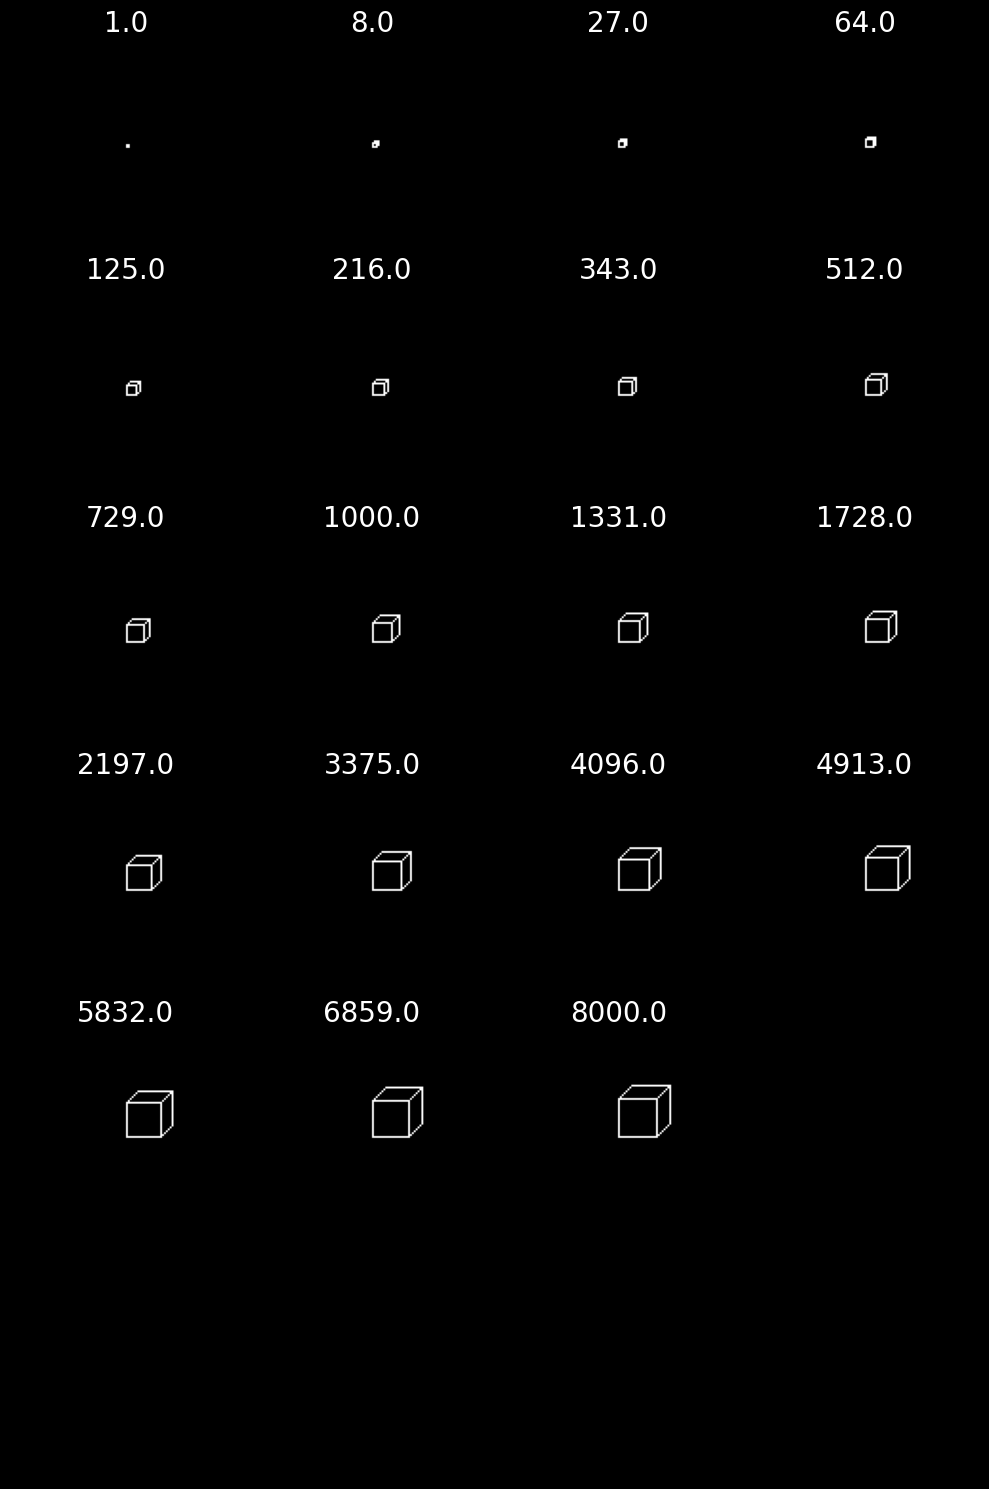

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the parameters
dataset = df_volume  # Replace with your actual DataFrame containing ground truth and predictions
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-10epoch/EXP1-Results/volume"  # Adjust the folder path for the area dataset

def filter_sort_and_group_df(df, base_folder=''):
    """
    Filters the DataFrame for a specific model, sorts and groups by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.
    """
    # Filter for the specific model "CustomLLaMA" and ground truth range
    df = df[(df['model_name'] == 'CustomLLaMA') & 
            (df['ground_truth'] >= 0) & 
            (df['ground_truth'] <= 9000)]

    # Ensure numeric conversion for sorting
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization with 4 Rows
num_images = len(unique_ground_truth_df)
num_rows = 6  # Divide into 4 rows
num_columns = int(np.ceil(num_images / num_rows))  # Calculate the number of columns

# Create the figure and axes
fig, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * 2.5, num_rows * 2.5))  # Adjust figure size
fig.patch.set_facecolor("black")  # Set figure background to black

# Flatten axes for easy iteration
axes = axes.flatten()

for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    image_path = row['image_path']
    ground_truth = row['ground_truth']
    
    if os.path.exists(image_path):
        # Load the image as it is using matplotlib
        img = plt.imread(image_path)

        # Display the grayscale image
        axes[i].imshow(img, cmap='gray')  # Use grayscale colormap
        axes[i].axis('off')  # Turn off axis for each image

        # Display the ground truth value as the title
        label = f"{ground_truth:.1f}"
        axes[i].set_title(label, fontsize=20, pad=15, color="white")  # Title in white for black background

    else:
        # If the image file doesn't exist, display a placeholder text
        axes[i].text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=12, color="white")
        axes[i].set_facecolor("black")
        axes[i].axis('off')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot with black background
plt.show()


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 828
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   model_name          817 non-null    object 
 1   run                 817 non-null    object 
 2   image_path          817 non-null    object 
 3   ground_truth        817 non-null    float64
 4   raw_answers         817 non-null    object 
 5   forced_repetitions  817 non-null    float64
 6   time_ms             817 non-null    float64
 7   parsed_answers      817 non-null    object 
dtypes: float64(3), object(5)
memory usage: 57.4+ KB


/tmp/ipykernel_2555117/3907013853.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
/tmp/ipykernel_2555117/3907013853.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')


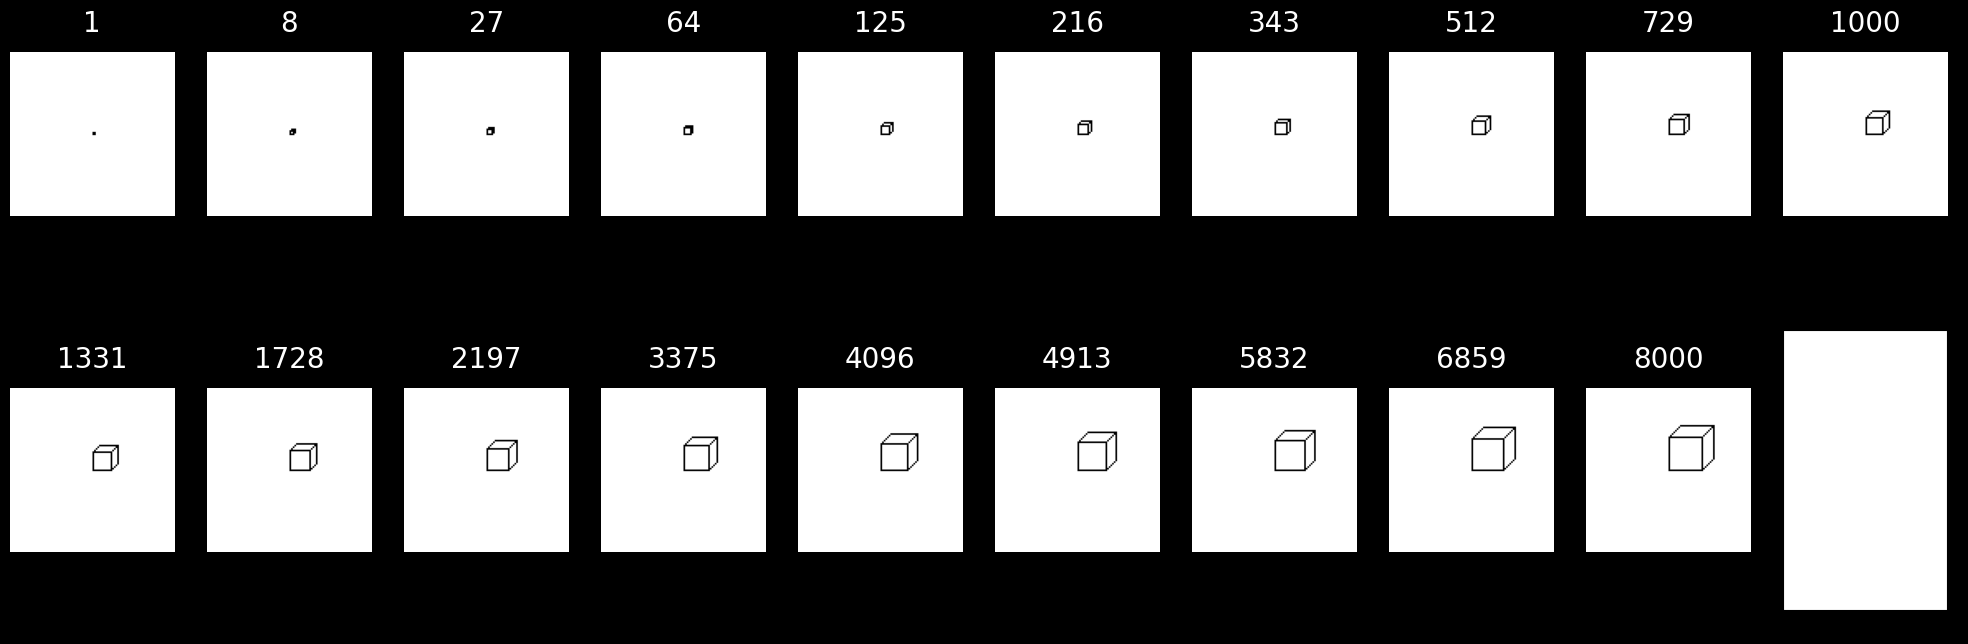

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os

# Define the parameters
dataset = df_volume  # Replace with your actual DataFrame containing ground truth and predictions
base_folder = "/home/huuthanhvy.nguyen001/tmp/LLMP/EXP/EXPs-5000-10epoch/EXP1-Results/volume"  # Adjust the folder path for the area dataset

def filter_sort_and_group_df(df, base_folder=''):
    """
    Filters the DataFrame for a specific model, sorts and groups by ground_truth,
    then aggregates parsed answers by ground_truth and adds the full path for images.
    """
    # Filter for the specific model "CustomLLaMA" and ground truth range
    df = df[(df['model_name'] == 'CustomLLaMA') & 
            (df['ground_truth'] >= 0) & 
            (df['ground_truth'] <= 9000)]

    # Ensure numeric conversion for sorting
    df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
    df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')

    # Sort the DataFrame by 'ground_truth' and then by 'parsed_answers' in ascending order
    df_sorted = df.sort_values(by=['ground_truth', 'parsed_answers'], ascending=[True, True])

    # Group by 'ground_truth' and aggregate parsed answers and the first image path
    unique_ground_truth_df = df_sorted.groupby('ground_truth').agg({
        'parsed_answers': list,            # Aggregate parsed answers into a list
        'image_path': 'first'              # Use the first image path for each unique ground_truth
    }).reset_index()

    # Update the image_path column to include the full path for each image
    unique_ground_truth_df['image_path'] = unique_ground_truth_df['image_path'].apply(
        lambda x: os.path.join(base_folder, os.path.basename(x))
    )

    return unique_ground_truth_df

def process_image(image_path):
    """
    Processes the image to ensure it has a black background, white content,
    and removes any unwanted borders.
    """
    # Open the image and convert it to grayscale
    img = Image.open(image_path).convert("L")  # Convert to grayscale (L mode)
    
    # Invert the image to make the content white
    img_inverted = ImageOps.invert(img)
    
    # Create a fully black background the same size as the image
    black_canvas = Image.new("RGB", img.size, "black")  # Create a black canvas

    # Composite the white content onto the black background
    img_with_black_bg = Image.composite(img_inverted.convert("RGB"), black_canvas, img_inverted)
    
    # Crop the image to the bounding box of the content to remove unwanted borders
    bbox = img_inverted.getbbox()  # Get the bounding box of the non-black content
    if bbox:
        img_cropped = img_with_black_bg.crop(bbox)  # Crop to content
    else:
        img_cropped = img_with_black_bg  # If no content, use the original
    
    return img_cropped

# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization with Black Background and No White Box
num_images = len(unique_ground_truth_df)
num_columns = (num_images + 1) // 2  # Divide images into two rows
fig, axes = plt.subplots(2, num_columns, figsize=(num_columns * 2.5, 8))  # Adjust figure size for two rows

# Set figure background to black
fig.patch.set_facecolor("black")

# Flatten axes for easy iteration
axes = axes.flatten()

for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    image_path = row['image_path']
    ground_truth = row['ground_truth']
    
    if os.path.exists(image_path):
        # Process the image to have a black background and white content
        processed_img = process_image(image_path)

        # Display the processed and cropped image
        axes[i].imshow(processed_img)
        axes[i].axis('off')  # Turn off axis for each image

        # Display the ground truth value as the title without ".0"
        label = f"{int(ground_truth)}"  # Convert to integer for whole number display
        axes[i].set_title(label, fontsize=20, pad=15, color="white")  # Title in white for black background

    else:
        # If the image file doesn't exist, display a placeholder text
        axes[i].text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=12, color="white")
        axes[i].set_facecolor("black")
        axes[i].axis('off')




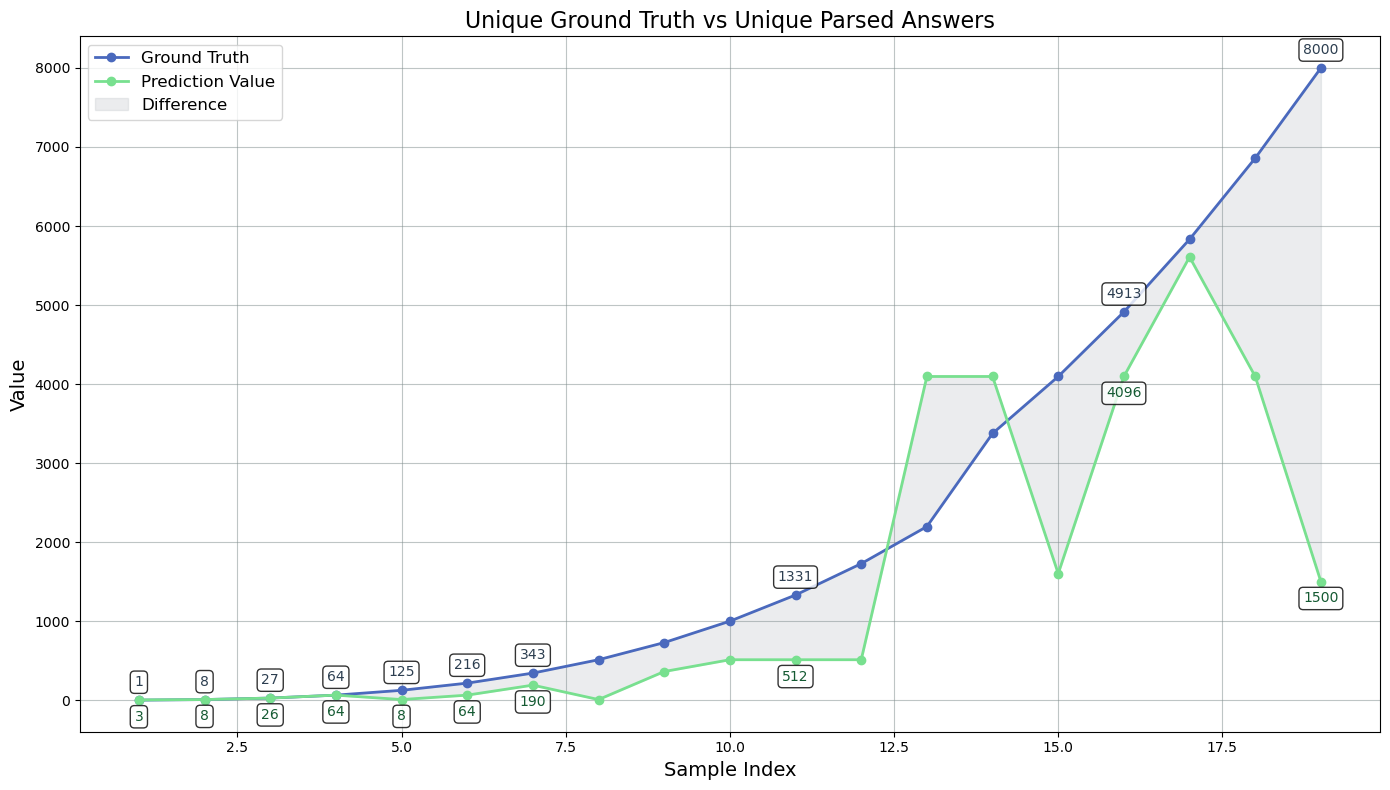

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming `unique_ground_truth_df` is already prepared
# Extract data for plotting
ground_truth = unique_ground_truth_df['ground_truth'].tolist()
parsed_answers = [np.mean(pa) for pa in unique_ground_truth_df['parsed_answers']]
indices = range(1, len(ground_truth) + 1)  # Sample indices for the x-axis

# Track unique values for annotation
unique_gt = set()
unique_pa = set()

# Create figure
plt.figure(figsize=(14, 8))

# Plot ground truth as a smooth line
plt.plot(indices, ground_truth, 'o-', label='Ground Truth', color='#4a69bd', linewidth=2, markersize=6)

# Plot parsed answers as a smooth line
plt.plot(indices, parsed_answers, 'o-', label='Prediction Value', color='#78e08f', linewidth=2, markersize=6)

# Fill the area between the lines to show the difference
plt.fill_between(indices, ground_truth, parsed_answers, color='#bdc3c7', alpha=0.3, label='Difference')

# Customize chart
plt.grid(True, color='#7f8c8d', alpha=0.5)  # Medium gray grid
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Unique Ground Truth vs Unique Parsed Answers', fontsize=16)
plt.legend(fontsize=12, loc='upper left')

# Annotate values
for i, (gt, pa) in enumerate(zip(ground_truth, parsed_answers)):
    # Check if value should be annotated (first 5 unique values or existing logic)
    annotate_gt = gt not in unique_gt and len(unique_gt) < 5
    annotate_pa = pa not in unique_pa and len(unique_pa) < 5

    if i % 5 == 0 or i == 0 or i == len(ground_truth) - 1 or annotate_gt or annotate_pa:
        # Annotate ground truth
        if annotate_gt:
            unique_gt.add(gt)
        plt.annotate(
            f'{int(gt)}', (i + 1, gt),  # Use int(gt) to remove decimal places
            textcoords="offset points", xytext=(0, 10), ha='center',
            fontsize=10, color='#2c3e50', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
        )
        # Annotate parsed answers
        if annotate_pa:
            unique_pa.add(pa)
        plt.annotate(
            f'{int(pa)}', (i + 1, pa),  # Use int(pa) to remove decimal places
            textcoords="offset points", xytext=(0, -15), ha='center',
            fontsize=10, color='#145a32', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
        )

# Make layout tight and show the plot
plt.tight_layout()
plt.show()


/tmp/ipykernel_2555117/4267735186.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ground_truth'] = pd.to_numeric(df['ground_truth'], errors='coerce')
/tmp/ipykernel_2555117/4267735186.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['parsed_answers'] = pd.to_numeric(df['parsed_answers'], errors='coerce')


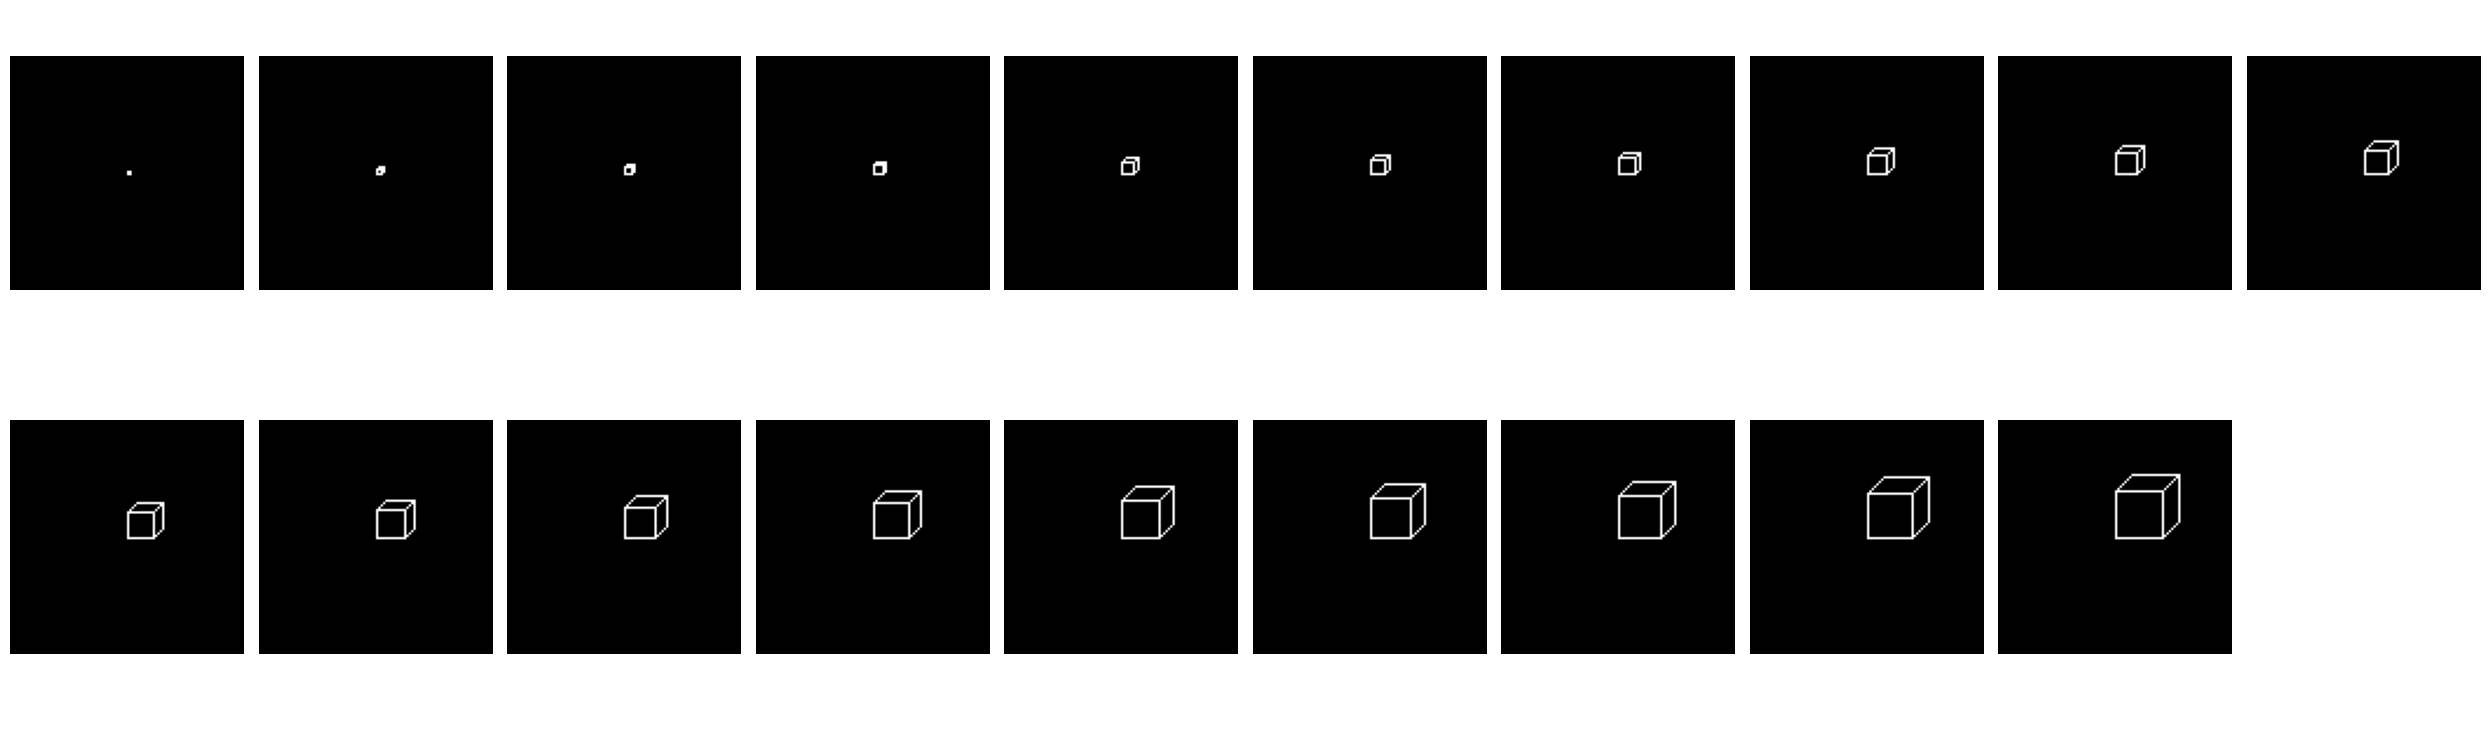

In [66]:
def process_image(image_path):
    """
    Opens the original image without applying any modifications.
    """
    # Open the image as is
    img = Image.open(image_path).convert("RGB")  # Ensure the image is in RGB mode
    return img


# Process the specified dataset with the base folder path
unique_ground_truth_df = filter_sort_and_group_df(dataset, base_folder=base_folder)

# Visualization with Black Background
num_images = len(unique_ground_truth_df)
num_columns = (num_images + 1) // 2  # Divide images into two rows
fig, axes = plt.subplots(2, num_columns, figsize=(num_columns * 2.5, 8))  # Adjust figure size for two rows

# Set figure background to black
fig.patch.set_facecolor("white")

# Flatten axes for easy iteration
axes = axes.flatten()

for i, (index, row) in enumerate(unique_ground_truth_df.iterrows()):
    image_path = row['image_path']
    ground_truth = row['ground_truth']
    
    if os.path.exists(image_path):
        # Open the original image
        original_img = process_image(image_path)

        # Display the original image
        axes[i].imshow(original_img)
        axes[i].axis('off')  # Turn off axis for each image

        # Display the ground truth value as the title
        label = f"{ground_truth:.1f}"
        axes[i].set_title(label, fontsize=24, pad=15, color="white")  # Title in white for black background

    else:
        # If the image file doesn't exist, display a placeholder text
        axes[i].text(0.5, 0.5, "Image not found", ha="center", va="center", fontsize=12, color="white")
        axes[i].set_facecolor("white")
        axes[i].axis('off')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot with black background
plt.show()


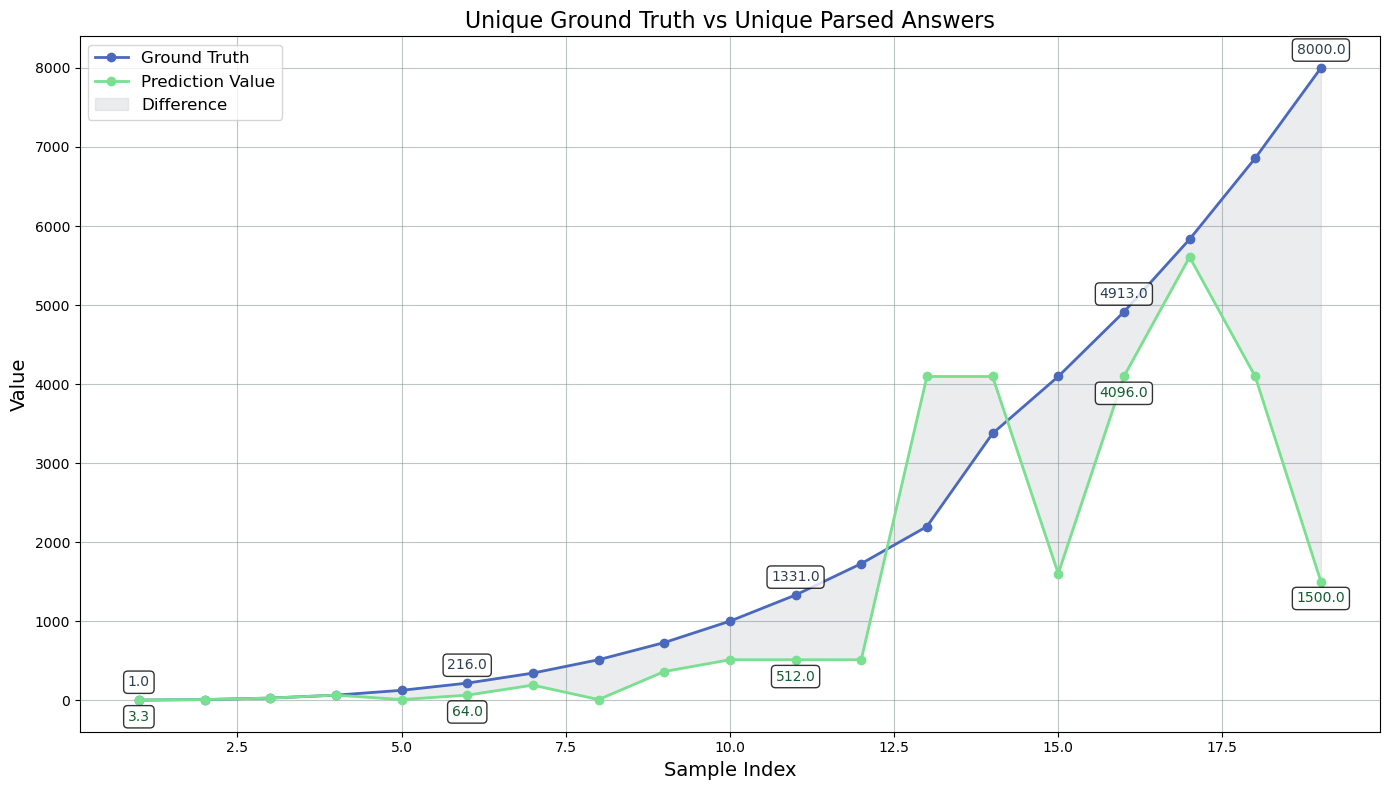

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming `unique_ground_truth_df` is already prepared
# Extract data for plotting
ground_truth = unique_ground_truth_df['ground_truth'].tolist()
parsed_answers = [np.mean(pa) for pa in unique_ground_truth_df['parsed_answers']]
indices = range(1, len(ground_truth) + 1)  # Sample indices for the x-axis

# Create figure
plt.figure(figsize=(14, 8))

# Plot ground truth as a smooth line
plt.plot(indices, ground_truth, 'o-', label='Ground Truth', color='#4a69bd', linewidth=2, markersize=6)

# Plot parsed answers as a smooth line
plt.plot(indices, parsed_answers, 'o-', label='Prediction Value', color='#78e08f', linewidth=2, markersize=6)

# Fill the area between the lines to show the difference
plt.fill_between(indices, ground_truth, parsed_answers, color='#bdc3c7', alpha=0.3, label='Difference')

# Customize chart
plt.grid(True, color='#7f8c8d', alpha=0.5)  # Medium gray grid
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Unique Ground Truth vs Unique Parsed Answers', fontsize=16)
plt.legend(fontsize=12, loc='upper left')


for i, (gt, pa) in enumerate(zip(ground_truth, parsed_answers)):
    # Annotate every 5th point, first, last, and specific key values
    if i % 5 == 0 or i == 0 or i == len(ground_truth) - 1 or gt in key_values or pa in key_values:
        # Highlight ground truth
        plt.annotate(
            f'{gt:.1f}', (i + 1, gt),
            textcoords="offset points", xytext=(0, 10), ha='center',
            fontsize=10, color='#2c3e50', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
        )
        # Highlight parsed answers
        plt.annotate(
            f'{pa:.1f}', (i + 1, pa),
            textcoords="offset points", xytext=(0, -15), ha='center',
            fontsize=10, color='#145a32', bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
        )

# Make layout tight and show the plot
plt.tight_layout()
plt.show()


